# Road Safety Forecasting: Predictive Modeling of Accident Severity in Addis Ababa

## Report compiled by :
1. Bonventure Osoro.
2. Brian Kipkorir.
3. Jacinta Fiona.
4. James Murigi.
5. Sandra Luyali.
6. Faith Nyawira.

## Report Overview.
1. Business Understanding
2. Data Understanding
3. Data Cleaning and Formating
4. EDA
5. Modeling
6. Model Refinement and Evaluation
7. Summary.
8. Recommendations.

### a. Introduction.

In a metroplitan setting, road accidents cast a far-reaching impact on both individuals and the urban fabric. As cities evolve with complex road networks and diverse transportation modes, the urgency to address road safety intensifies. Crucially, accurate classification of accident severity—spanning 'Slight Injury' and 'fatal Injury' is pivotal. This classification empowers urban planners, law enforcement, emergency responders, and policymakers to strategically allocate resources, enhance safety measures, and optimize emergency responses. Through data-driven insights and predictive modeling, our project aims to contribute to a safer urban landscape, where road safety remains an integral component of urban evolution.

For our project we will assume that we have three clients:
1. Addis Ababa urban planing institute
2. Addis Ababa emergency services
3. Addis Ababa Road Safety Authority

**Problem Statement**

In Addis Ababa's dynamic urban landscape, ensuring public safety and efficient resource allocation is a top priority. Classifying road traffic accidents into 'Slight Injury' and 'Serious Injury' categories offers actionable insights for informed decision-making and targeted interventions.

1. The Addis Ababa Urban Planning Institute aims to enhance safety by identifying high-risk zones through accurate accident severity classification, influencing road design and traffic flow management.

2. Emergency services require rapid response and resource allocation. Quick accident severity classification empowers responders to deploy resources promptly, potentially saving lives.

3. The Addis Ababa Road Safety Authority seeks to reduce accidents and their consequences. Precise accident severity classification aids in assessing safety measures and formulating effective policies.

In conclusion, precise classification of road traffic accidents empowers stakeholders to enhance safety and response strategies, contributing to a safer Addis Ababa.

### c. Objectives.

Based on the our problem statement, here are the five objectives for the project:

1. **Create Accurate Classification Model:** Develop a robust predictive model using multi-class classification to accurately categorize road accidents as 'Slight', 'Serious', or 'Fatal'.

2. **Enhance Model Precision:** Rigorously evaluate and refine the model's accuracy through comprehensive testing and data-driven adjustments.

3. **Inform Urban Planning Decisions:** Provide actionable insights to the Urban Planning Institute for identifying high-risk zones, improving safety measures, and aligning urban development strategies.

4. **Optimize Emergency Response:** Empower emergency services with rapid, accurate severity assessments to optimize resource allocation and response effectiveness.

5. **Shape Road Safety Initiatives:** Assist the Road Safety Authority in evaluating measures, crafting targeted awareness campaigns, and formulating policies tailored to different accident scenarios.

6. **Promote Safer Urban Environment:** Contribute to safer roads and an enhanced urban environment by minimizing accident impact and optimizing resource allocation for a secure Addis Ababa.

### d. Metrics Used For Evaluation.
Based on the objectives of the project, the following metrics can be considered for evaluating the success of the project:

1. **Severity Classification Accuracy:** Assess the overall correctness of our model's severity predictions across all categories.

2. **Severity Precision, Recall, and F1-Score:** Evaluate the precision, recall, and F1-score for each severity category to gauge the accuracy of our predictions for different accident levels.

3. **Severity Differentiation (AUC-ROC):** measure our model's ability to distinguish between severity classes, especially for binary scenarios like 'Slight' vs. 'serious' and Fatal.

4. **Confusion Matrix:** Construct a confusion matrix to visualize the number of correct and incorrect predictions for each severity category. This matrix helps in understanding the model's strengths and weaknesses.

These metrics collectively offer a comprehensive assessment of our project's predictive model, focusing on accuracy, precision, recall, differentiation, and robustness to imbalanced data.

### d. Metrics Used For success
Our project will be deemed a success if we achieve the following outcomes based on the defined metrics:

1. **High Severity Classification Accuracy:** A high overall correctness rate in predicting accident severity categories, ensuring that the model reliably categorizes accidents as 'Slight', 'Serious', or 'Fatal'.

2. **Balanced Precision, Recall, and F1-Score:** The precision, recall, and F1-scores for each severity category are well-balanced, indicating that the model's predictions are accurate across various levels of accident severity.

3. **Strong Severity Differentiation (High AUC-ROC):** The model demonstrates a strong ability to distinguish between severity classes, particularly in binary scenarios like 'Slight' vs. 'Serious', as indicated by a high Area Under the ROC curve.

4. **Interpretability through Confusion Matrix:** The confusion matrix provides clear insights into the number of accurate and inaccurate predictions for each severity category. This information helps us understand the model's strengths and areas for improvement.

5. **Generalization and Robustness:** The model performs well on unseen data, indicating that it can generalize effectively to new accident scenarios. It is also robust to imbalanced data, providing accurate predictions even for rare classes.

6. **Positive Stakeholder Feedback:** Key stakeholders, including the Addis Ababa Urban Planning Institute, Emergency Services, and Road Safety Authority, find value in the model's predictions. They can use these insights to inform decisions and enhance safety measures.

7. **Optimized Resource Allocation:** The model contributes to optimized resource allocation by enabling emergency responders to efficiently allocate resources based on predicted severity levels, potentially leading to reduced response times and enhanced emergency services.

8. **Safer Urban Environment:** The model's predictions contribute to a safer urban environment by influencing urban planning decisions, emergency response effectiveness, and road safety initiatives. This is reflected in a reduction of accident severity and improved allocation of safety resources.

By achieving these outcomes, we will have successfully developed a robust and reliable predictive model that effectively addresses the project's objectives, empowers stakeholders with actionable insights, and contributes to the enhancement of road safety and urban well-being in Addis Ababa.

## 2. Data Assembly And Preparation

In [14]:
# importing the necessary libraries...arranged in order by name
# you can find more details in requirements.txt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2_contingency, skew, boxcox, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score, auc, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from statistics import mode


In [15]:
##define useful constants that will be used throughout the project to avoid redundancy :

# settings  for all plots and visualizations
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="pastel", rc=custom_params)

In [16]:
##Load Dataset.
df=pd.read_csv('/Users/sandramukenya/Desktop/Group12 Project/phasecollaboration/data.csv')
## print first three rows of the datasest
df.head(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury


## 3 Data Understanding

Data understanding is a critical step in any data analysis or modeling process. It involves getting familiar with the dataset, its features, and its characteristics. Based on the dataset used, here's a data understanding summary:

<a href="https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents">Kaggle Page</a>

**Dataset Overview:**
- Source: Addis Ababa Sub city police department records
- Time Period: Year 2017-2020
- Number of Instances (Rows): 12316
- Number of Features (Columns): 32

**Columns:** (with data type in brackets)
1. 'Time': The time of the accident occurrence. (ordinal)
2. 'Day_of_week': The day of the week when the accident occurred. (norminal)
3. 'Age_band_of_driver': Age group of the driver involved in the accident. (ordinal)
4. 'Sex_of_driver': Gender of the driver. (norminal)
5. 'Educational_level': Educational level of the driver. (ordinal)
6. 'Vehicle_driver_relation': Relationship between the driver and the vehicle. (norminal)
7. 'Driving_experience': Experience level of the driver. (ordinal)
8. 'Type_of_vehicle': Type of vehicle involved in the accident. (norminal)
9. 'Owner_of_vehicle': Owner of the vehicle. (norminal)
10. 'Service_year_of_vehicle': Years of service of the vehicle. (ordinal)
11. 'Defect_of_vehicle': Defect of the vehicle that might have contributed to the accident. (norminal)
12. 'Area_accident_occured': Area where the accident occurred. (norminal)
13. 'Lanes_or_Medians': Information about lanes or medians. (norminal)
14. 'Road_allignment': Alignment of the road. (norminal)
15. 'Types_of_Junction': Type of road junction where the accident occurred. (norminal)
16. 'Road_surface_type': Type of road surface. (norminal)
17. 'Road_surface_conditions': Conditions of the road surface during the accident. (norminal)
18. 'Light_conditions': Lighting conditions during the accident. (ordinal)
19. 'Weather_conditions': Weather conditions during the accident. (norminal)
20. 'Type_of_collision': Type of collision that occurred. (norminal)
21. 'Number_of_vehicles_involved': Number of vehicles involved in the accident. (discrete)
22. 'Number_of_casualties': Number of casualties in the accident. (discrete)
23. 'Vehicle_movement': Movement of the vehicle at the time of the accident. (norminal)
24. 'Casualty_class': Class of the casualty (e.g., driver, passenger, pedestrian). (norminal)
25. 'Sex_of_casualty': Gender of the casualty. (norminal)
26. 'Age_band_of_casualty': Age group of the casualty. (ordinal)
27. 'Casualty_severity': Severity level of the casualty. (ordinal)
28. 'Work_of_casuality': Occupation or work status of the casualty. (norminal)
29. 'Fitness_of_casuality': Fitness status of the casualty. (norminal)
30. 'Pedestrian_movement': Movement of pedestrians involved in the accident. (norminal)
31. 'Cause_of_accident': Probable cause of the accident. (norminal)
32. 'Accident_severity': Severity level of the accident. (ordinal) ~ Target

The `get_more_info` function below is an improved version of `df.info()` in Pandas. It takes a DataFrame as input, creates a copy, and then displays detailed information for each column. This includes the column's name, data type, percentage of missing values, count of unique values, and the unique values themselves. It's a useful tool for comprehensive data exploration.

In [17]:
def get_more_info(dataframe):
    """
    An upgrade on the default df.info()
    
    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.

    Returns:
    str: prints out the column name, its data type, the number of missing values its has
    , the number of unique values it has, and the unique values.
    """
    function_df = dataframe.copy() # create a copy of dataframe
    for col in function_df.columns:
        print("------------------------------------------------------------------")
        missing_percentage = round(function_df[col].isna().sum() * 100 / len(function_df), 2) # round to 2dp
        print("Column name: ", col)
        print("Dtype: ", function_df[col].dtype) # get data type
        print("Missing values (%): ", missing_percentage)
        print("# Unique values: ", function_df[col].nunique()) # get number of unique values
        print("Unique values: ", function_df[col].unique()) # get a list of the unique values
        print("------------------------------------------------------------------")
get_more_info(df)

------------------------------------------------------------------
Column name:  Time
Dtype:  object
Missing values (%):  0.0
# Unique values:  1074
Unique values:  ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
------------------------------------------------------------------
------------------------------------------------------------------
Column name:  Day_of_week
Dtype:  object
Missing values (%):  0.0
# Unique values:  7
Unique values:  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
------------------------------------------------------------------
------------------------------------------------------------------
Column name:  Age_band_of_driver
Dtype:  object
Missing values (%):  0.0
# Unique values:  5
Unique values:  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
------------------------------------------------------------------
------------------------------------------------------------------
Column name:  Sex_of_driver
Dty

## 4. Data Cleaning and Formatting

### Handling missing values

In [18]:
#checking for missing values
# Treat "na", "Unknown", "Unknown or other", and "unknown" as Null
df.replace(["na", "Unknown", "unknown", "Unknown or other"], np.nan, inplace=True)
missing = df.isnull().sum() # add up all missing values per column
missing_value_df = pd.DataFrame(index= missing.index, data={
                                 'total_missing': missing.values})
missing_value_df.sort_values('total_missing', ascending=True, inplace=True)
missing_value_df

##16 columns have missing values

,total_missing
Time,0
Number_of_casualties,0
Number_of_vehicles_involved,0
Light_conditions,0
Road_surface_conditions,0
Accident_severity,0
Day_of_week,0
Cause_of_accident,25
Road_allignment,142
Type_of_collision,169


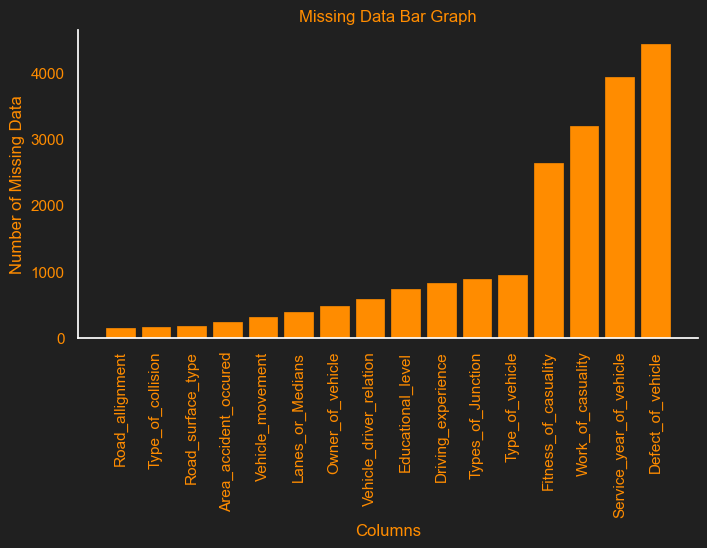

In [19]:
# Data
categories = ['Time', 'Pedestrian_movement', 'Casualty_severity', 'Age_band_of_casualty', 'Sex_of_casualty', 'Casualty_class', 'Number_of_casualties', 'Number_of_vehicles_involved', 'Weather_conditions', 'Light_conditions', 'Road_surface_conditions', 'Cause_of_accident', 'Accident_severity', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Road_allignment', 'Type_of_collision', 'Road_surface_type', 'Area_accident_occured', 'Vehicle_movement', 'Lanes_or_Medians', 'Owner_of_vehicle', 'Vehicle_driver_relation', 'Educational_level', 'Driving_experience', 'Types_of_Junction', 'Type_of_vehicle', 'Fitness_of_casuality', 'Work_of_casuality', 'Service_year_of_vehicle', 'Defect_of_vehicle']
missing_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 155, 172, 239, 308, 385, 482, 579, 741, 829, 887, 950, 2635, 3198, 3928, 4427]

# Filter columns with missing counts greater than 0
valid_categories = [category for category, count in zip(categories, missing_counts) if count > 0]
valid_missing_counts = [count for count in missing_counts if count > 0]

# Create bar graph
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(valid_categories, valid_missing_counts, color='darkorange')
fig.set_facecolor('#202020')  # Set background color to a darker shade
ax.set_facecolor('#202020')    # Set axis background color to the same shade

# Set text color to dark orange
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.5)
    bar.set_color('darkorange')

ax.set_xlabel('Columns', color='darkorange')
ax.set_ylabel('Number of Missing Data', color='darkorange')
ax.set_title('Missing Data Bar Graph', color='darkorange')
ax.tick_params(axis='x', rotation=90, colors='darkorange')
ax.tick_params(axis='y', colors='darkorange')

# Set x and y axis lines to white
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Save the graph as an image file (e.g., PNG)
plt.savefig('missing_data_graph.png', bbox_inches='tight', dpi=300, facecolor='#202020')

plt.show()


#### Solution :

**The strategy used to fix missing values was dropping columns that have more than 1000 values as Null.**

These are:
- Types_of_Junction
- Age_band_of_driver
- Fitness_of_casuality 
- Work_of_casuality 
- Defect_of_vehicle 
- Casualty_class 
- Sex_of_casualty 
- Age_band_of_casualty 
- Casualty_severity 
- Service_year_of_vehicle 

In [20]:
#Dropping columns and rows with null values as explained above:
threshold = 1000 
#Drop columns with more than the threshold number of null values
df = df.dropna(axis=1, thresh=df.shape[0] - threshold + 1)
#this drops 10 columns.
#now we drop all rows with missing data (NaN)
df=df.dropna()
# prints columns and rows of our subset
df.shape
# resulting dataset shape (8337, 22)

(8337, 22)

### Handling duplicates

In [21]:
# check for duplicated
df.duplicated().sum()

1

In [22]:
# drop duplicated column
df.drop_duplicates(inplace=True)

### Formatting the "Time" column
In this section, we'll be extracting the hour from the 'Time' column because it allows us to create a new feature that<br> captures important information without introducing additional noise. By simplifying the representation of the data, I aim to reduce<br> the variance of the column and make it more usable for downstream tasks such as machine learning models.
This code below converts 'Time' column to datetime format, extracts the hour into a new 'Hour' column, and drops the original 'Time' column from the DataFrame.

In [23]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour # extract hour from time
df.drop(columns="Time", inplace=True) # Time column will no longer be needed
df.columns

/var/folders/5p/_ym4smx13fz6wzf3g3sxmdd80000gn/T/ipykernel_18008/1186836373.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


Index(['Day_of_week', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'Hour'],
      dtype='object')

## 5 Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is essential before advancing model development and evaluation. Bivariate and Univariate analyses provide insights into variable relationships and impacts on Accident Severity.

Bivariate analysis examines variable pairs, using tests like Anova and Chi-Squared to reveal associations and anomalies. Univariate analysis assesses individual feature distributions, crucial for model selection.
Key Findings:
1. **Class Imbalance:** Significant in target (Accident Severity).
2. **Feature Imbalance:** Many features show imbalances, impacting potential contributions.
3. **Statistical Tests:** ANOVA, Chi-Squared show limited significance between feature means/distributions across target levels, guiding feature selection.

### Univariate analysis

Necessary function for univariate analysis

This code below provides two functions for visualizing data distributions using Matplotlib and Seaborn with a dark color background:

1. `plot_class_distribution(column, df)`: Creates a bar graph to display the distribution of classes within a categorical column. It calculates percentages, creates a bar plot using Seaborn, adds percentages on top of each bar, sets labels and titles, and saves the graph as an image file.

2. `plot_discrete_numeric_distribution(column, df)`: Generates a histogram to visualize the distribution of a discrete numeric column. It uses Matplotlib to create the histogram, sets labels and titles, and saves the graph as an image file.

Both functions save the generated graphs as PNG images with the column name followed by "_distribution.png" and a dark color background. These functions are useful for gaining insights into data distributions, particularly in exploratory data analysis.

In [24]:
# Set the dark color background
plt.style.use('dark_background')

def plot_class_distribution(column, df):
    """
    Create a bar graph to show the distribution of classes within a column.

    Parameters:
    column (str): Name of the column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Get value counts and calculate percentages
    value_counts = df[column].value_counts()
    total_count = value_counts.sum()
    percentages = (value_counts / total_count) * 100

    # Create bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentages.index, y=percentages.values, color='darkorange')

    # Add percentages on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}%', ha="center", color='white')

    plt.xlabel(column, color='darkorange')
    plt.ylabel('Percentage', color='darkorange')
    plt.title(f'Distribution of {column} Classes', color='darkorange')
    plt.xticks(rotation=90, color='darkorange')
    plt.tight_layout()
    
    # Save the graph as an image file (e.g., PNG)
    plt.savefig(f'{column}_distribution.png', bbox_inches='tight', dpi=300, facecolor='#202020')
    
    plt.show()

def plot_discrete_numeric_distribution(column, df):
    """
    Create a histogram to visualize the distribution of a discrete numeric column.

    Parameters:
    column (str): Name of the column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins='auto', edgecolor='black', alpha=0.7, color='darkorange')
    
    plt.xlabel(column, color='darkorange')
    plt.ylabel('Frequency', color='darkorange')
    plt.title(f'Distribution of {column}', color='darkorange')
    plt.tight_layout()
    
    # Save the graph as an image file (e.g., PNG)
    plt.savefig(f'{column}_distribution.png', bbox_inches='tight', dpi=300, facecolor='#202020')
    
    plt.show()


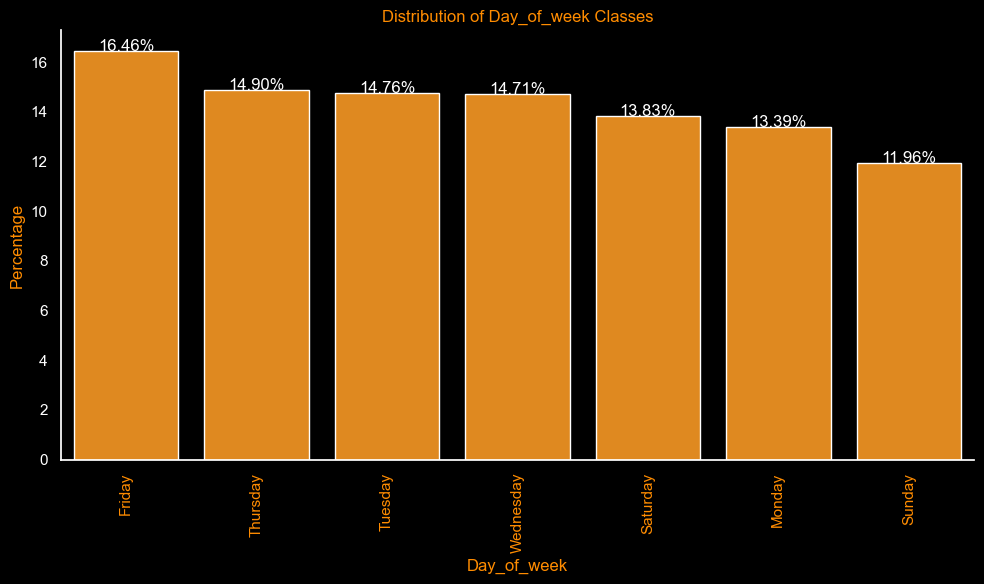

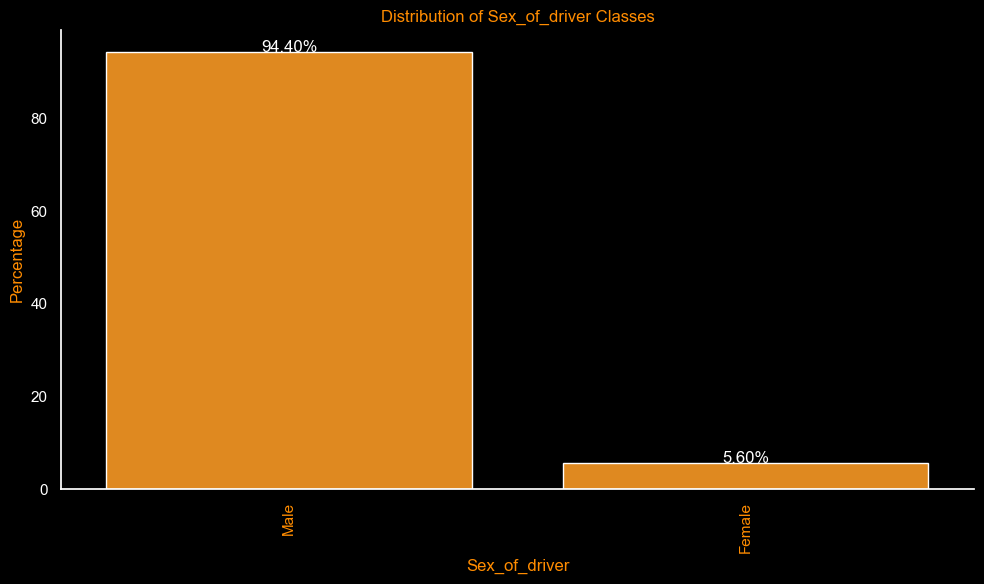

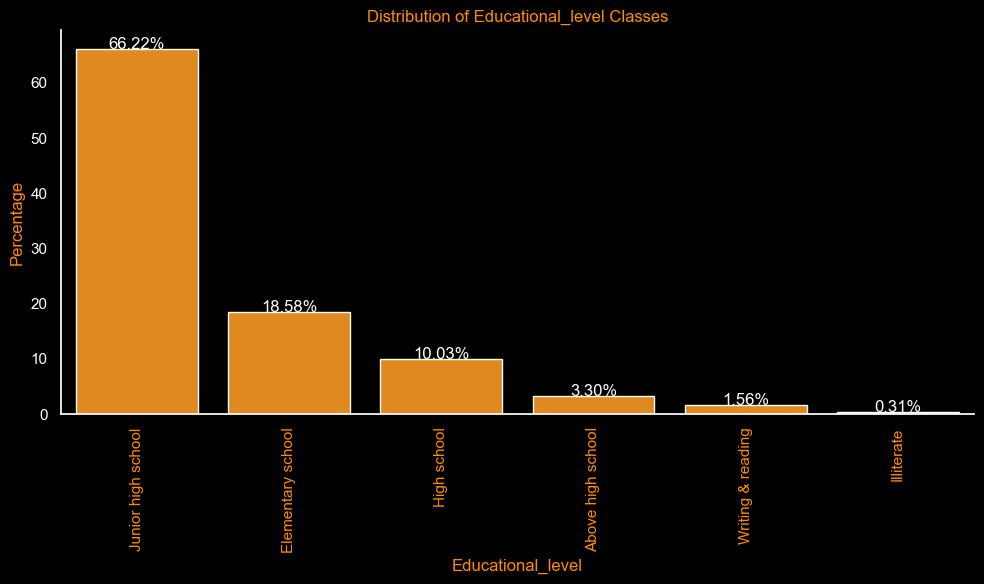

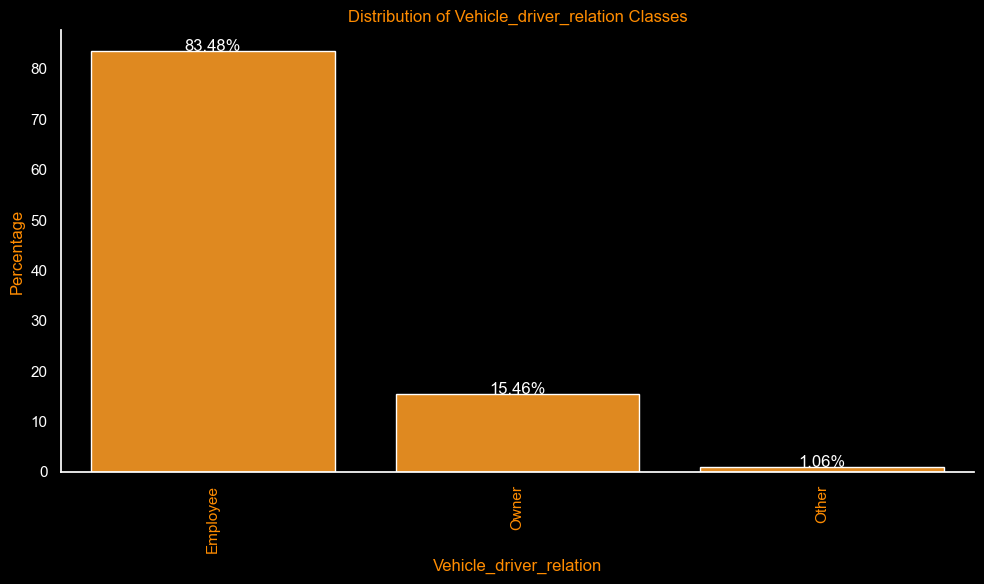

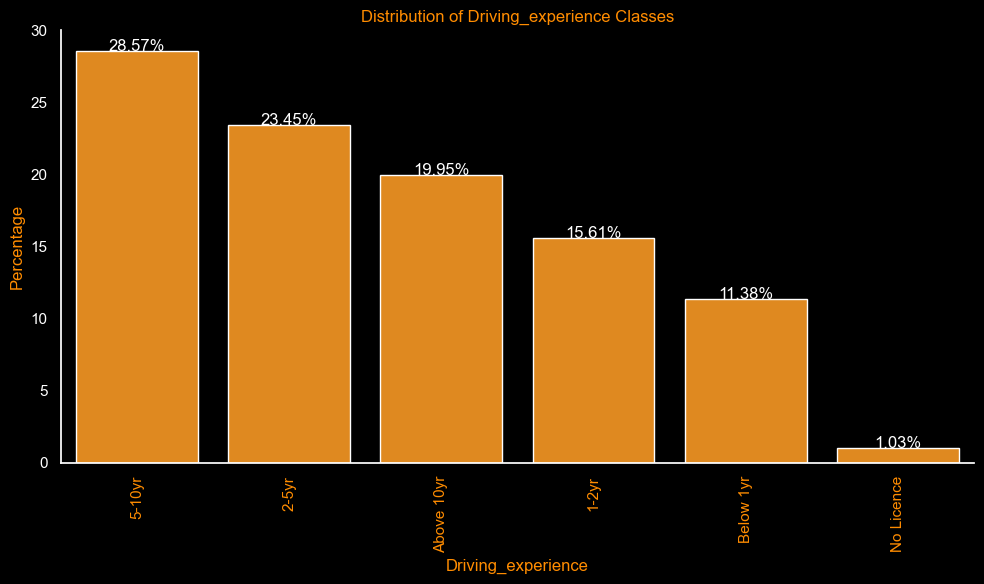

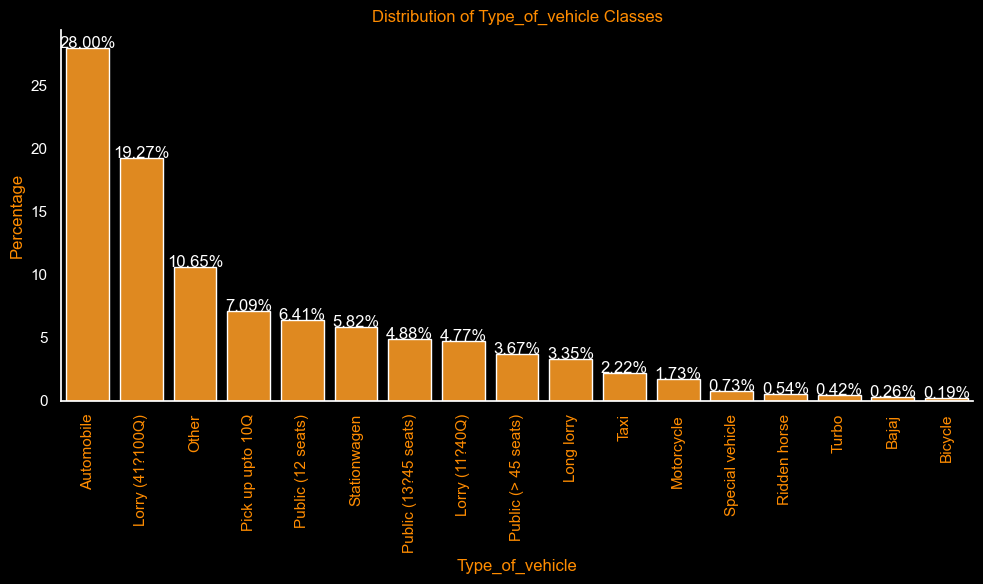

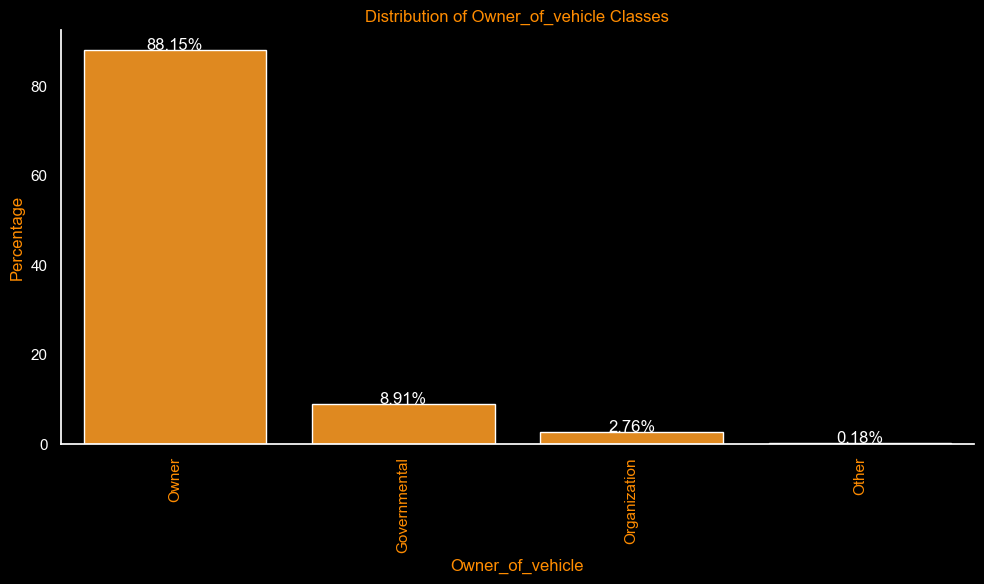

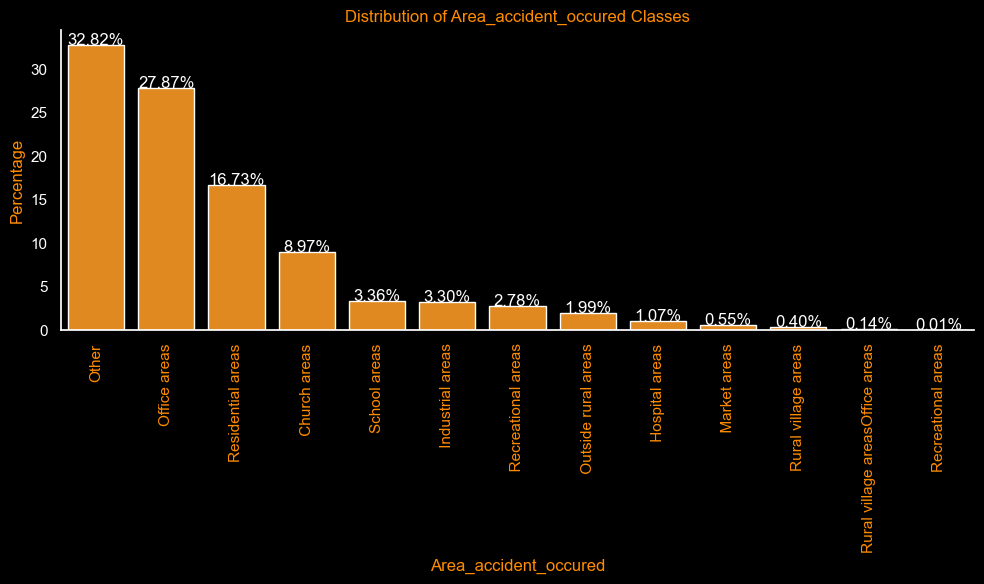

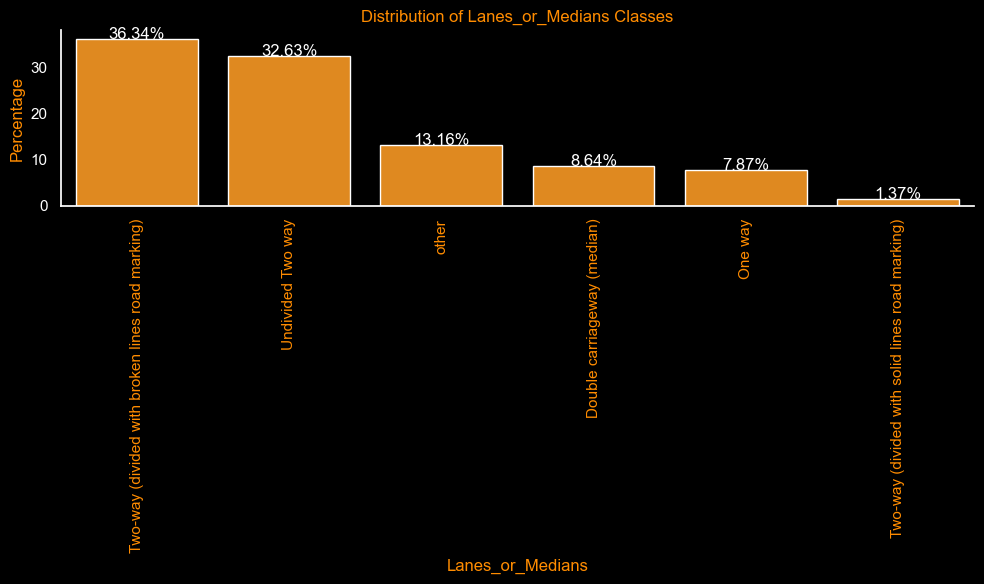

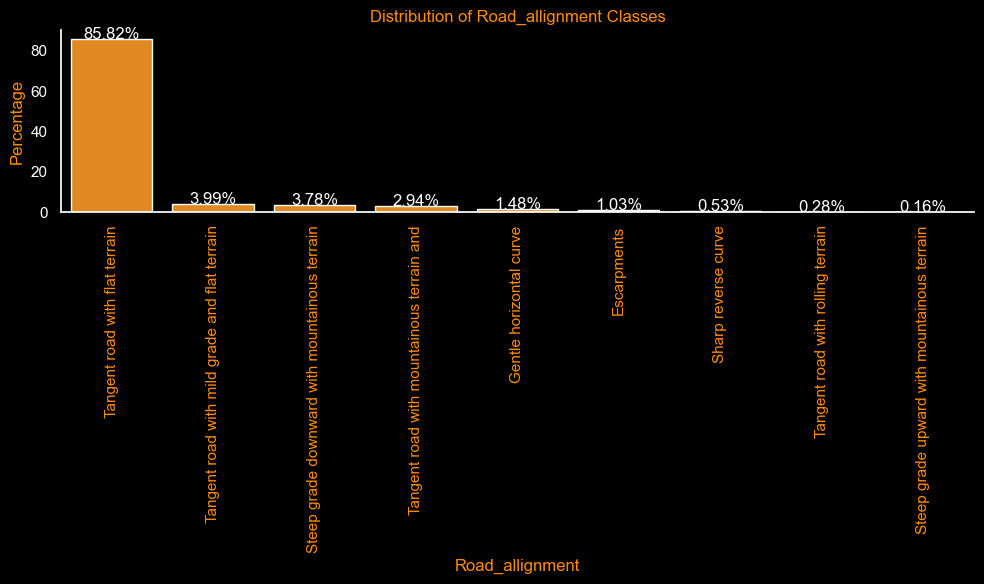

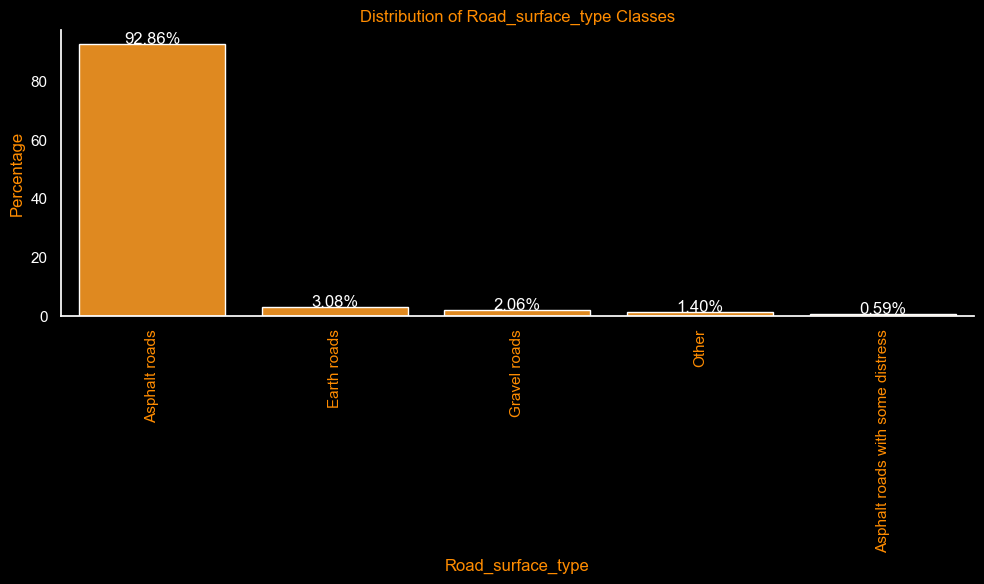

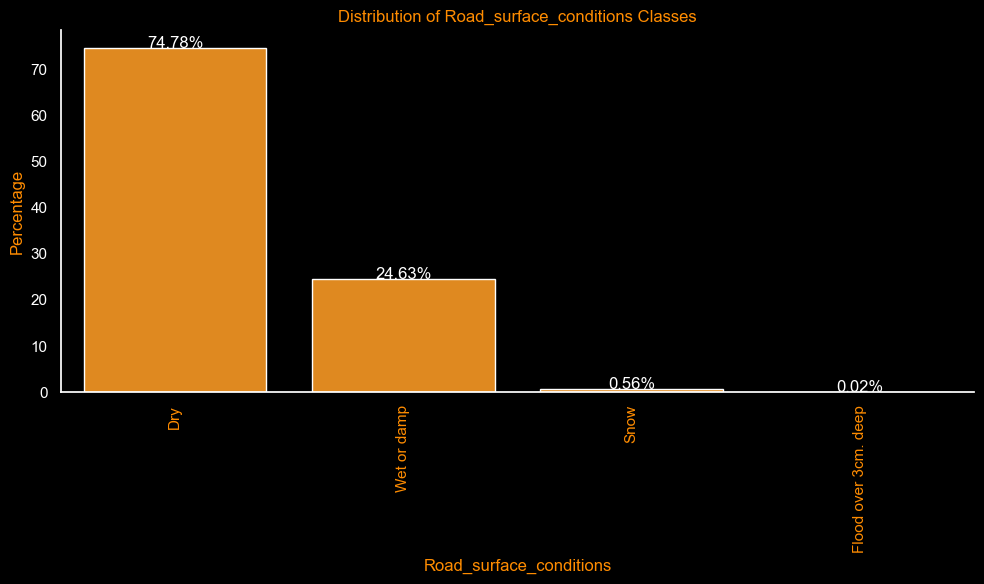

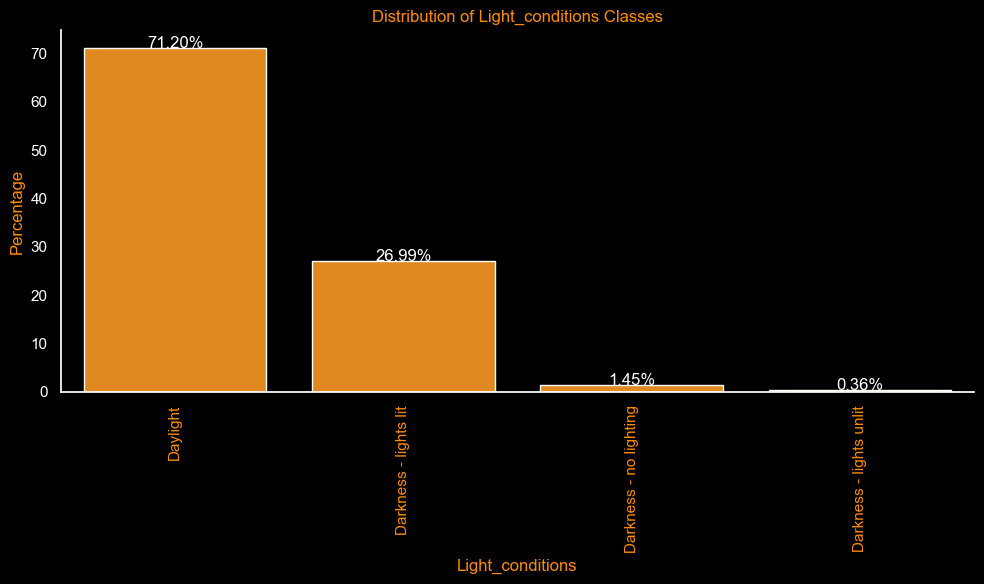

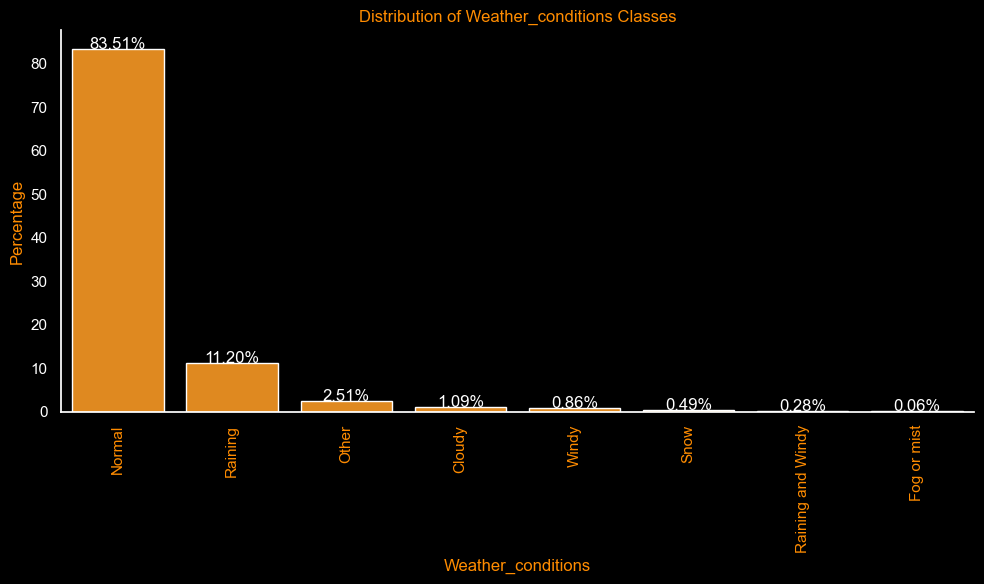

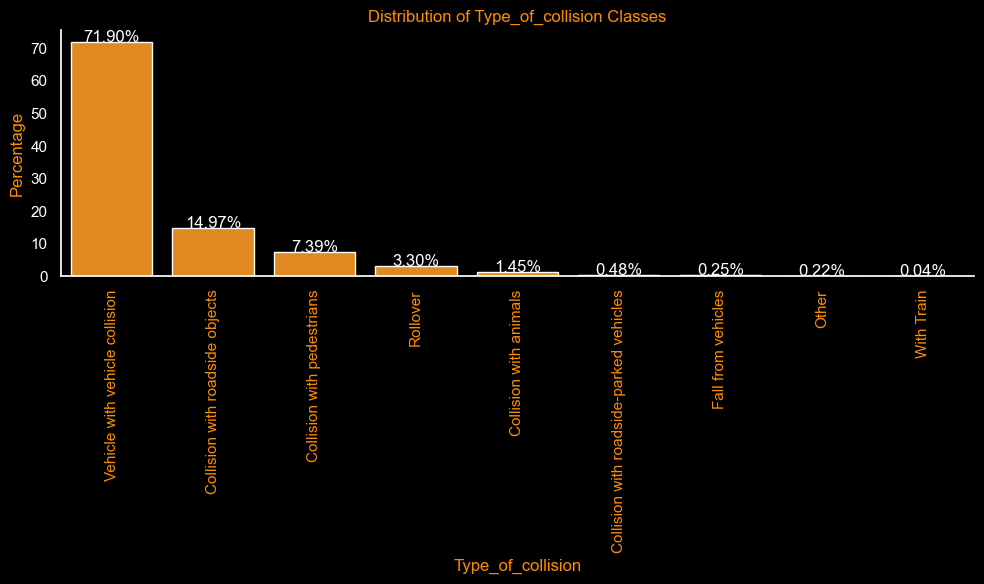

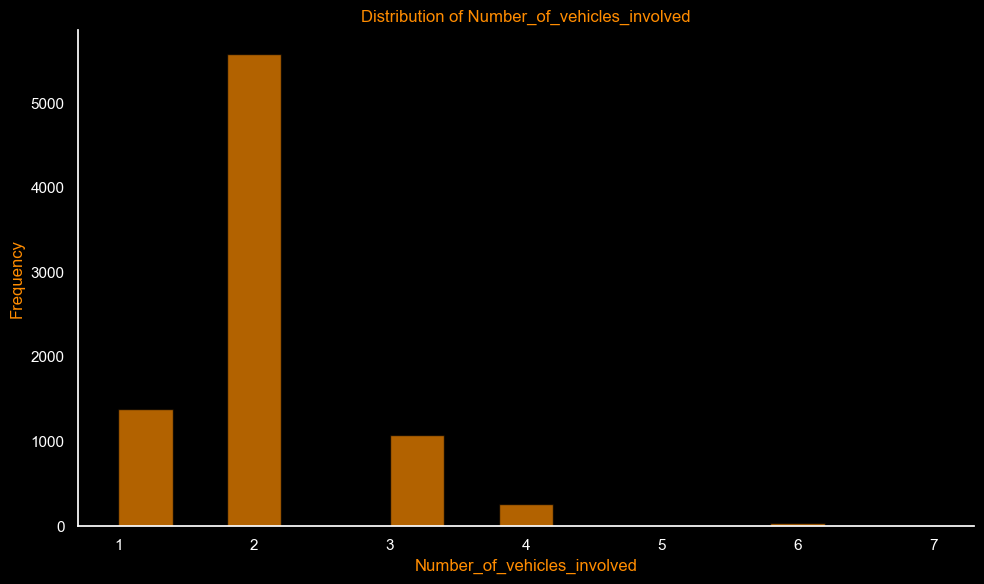

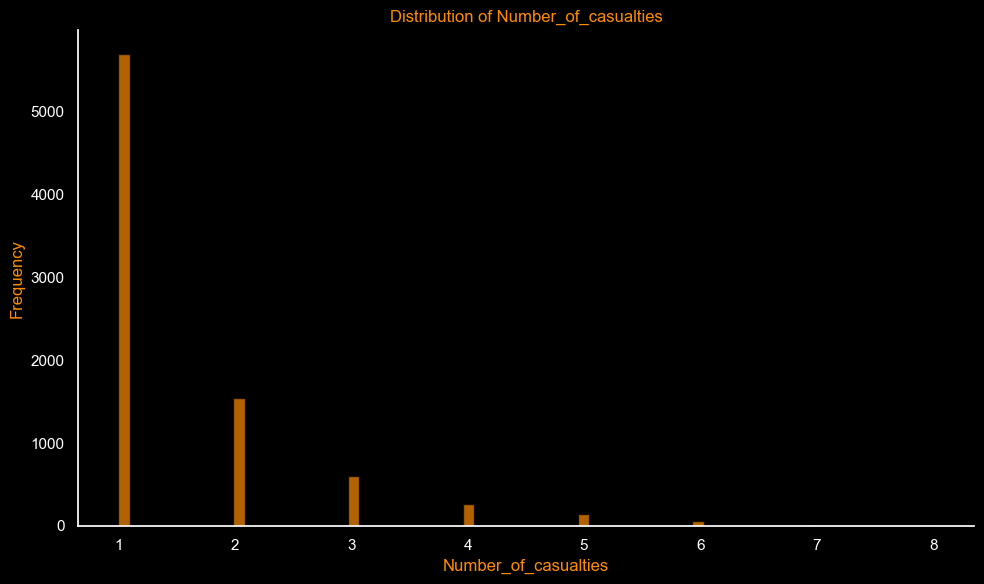

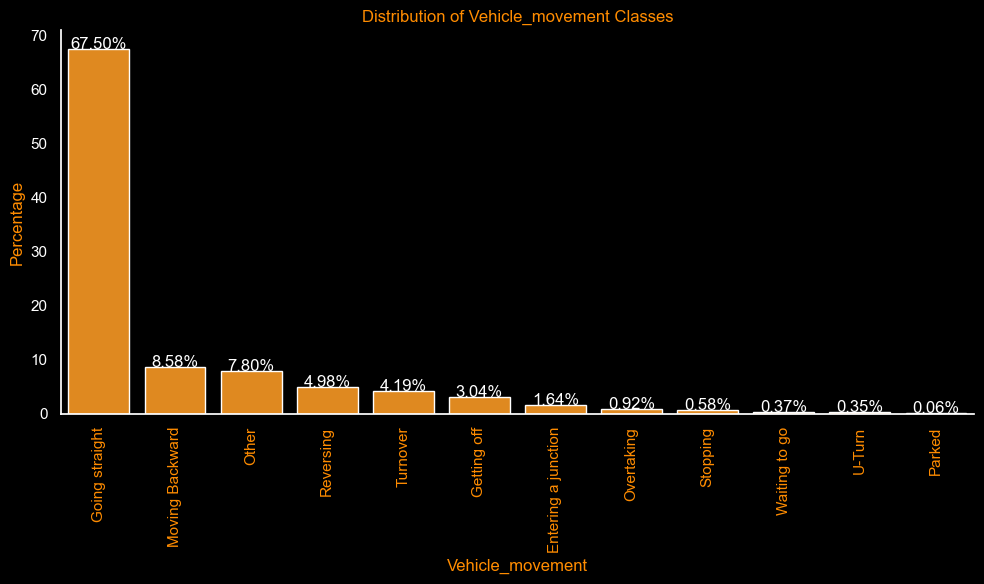

/var/folders/5p/_ym4smx13fz6wzf3g3sxmdd80000gn/T/ipykernel_18008/1205073777.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


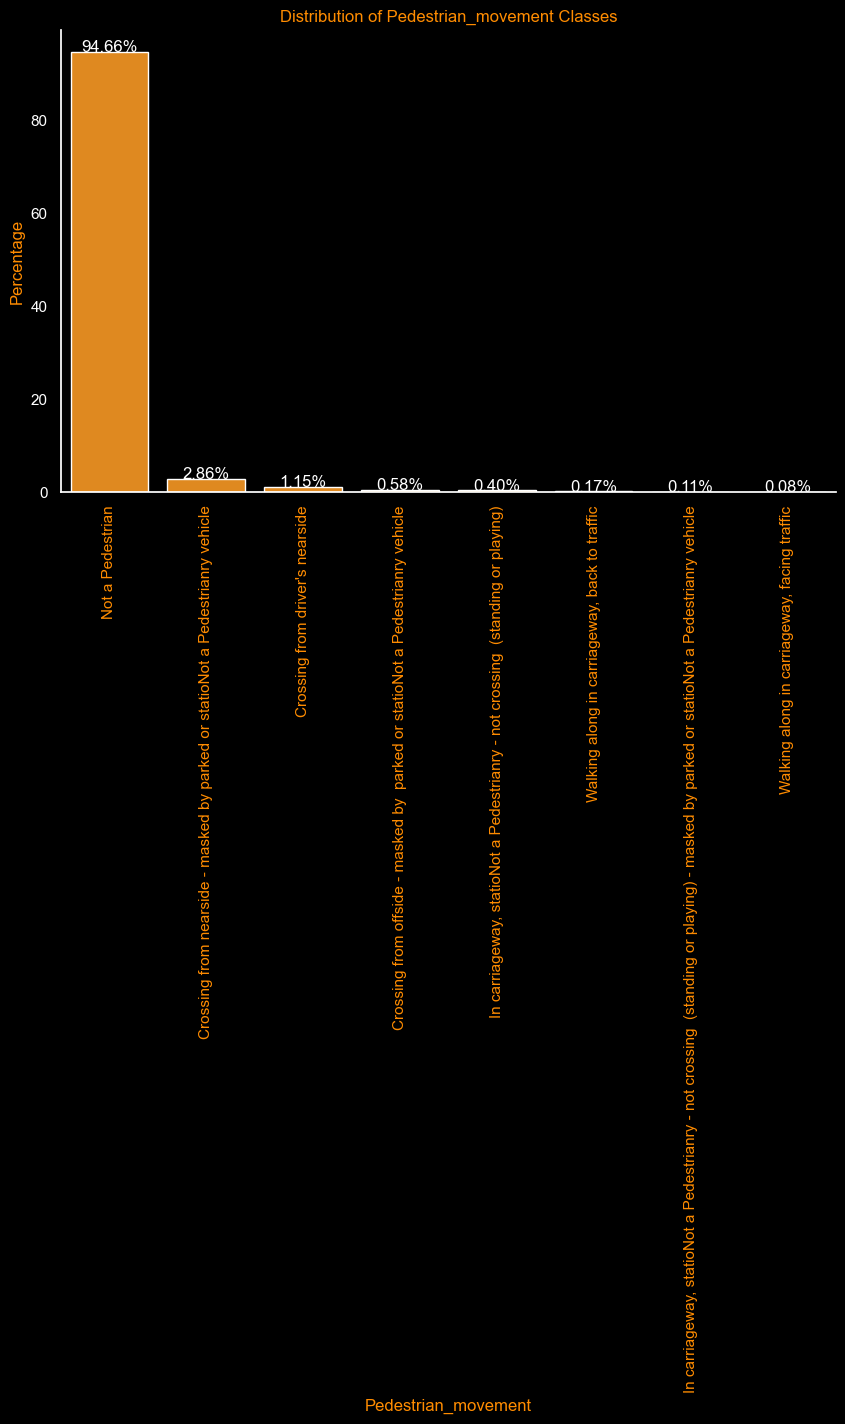

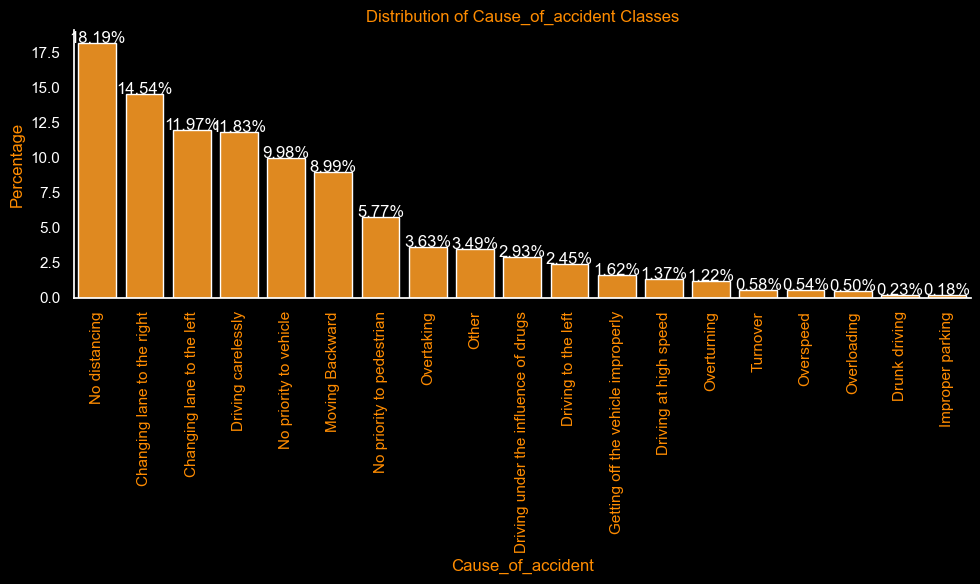

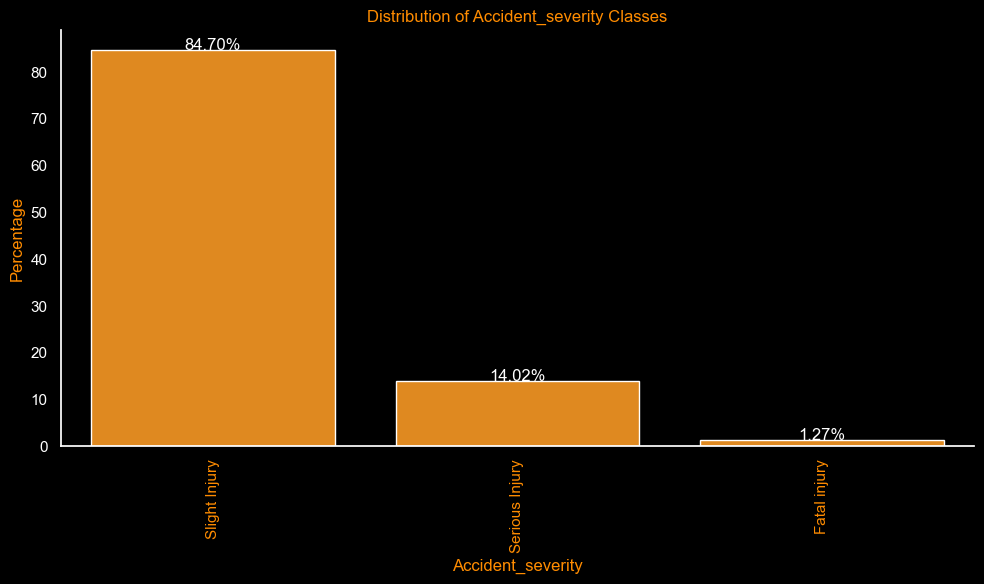

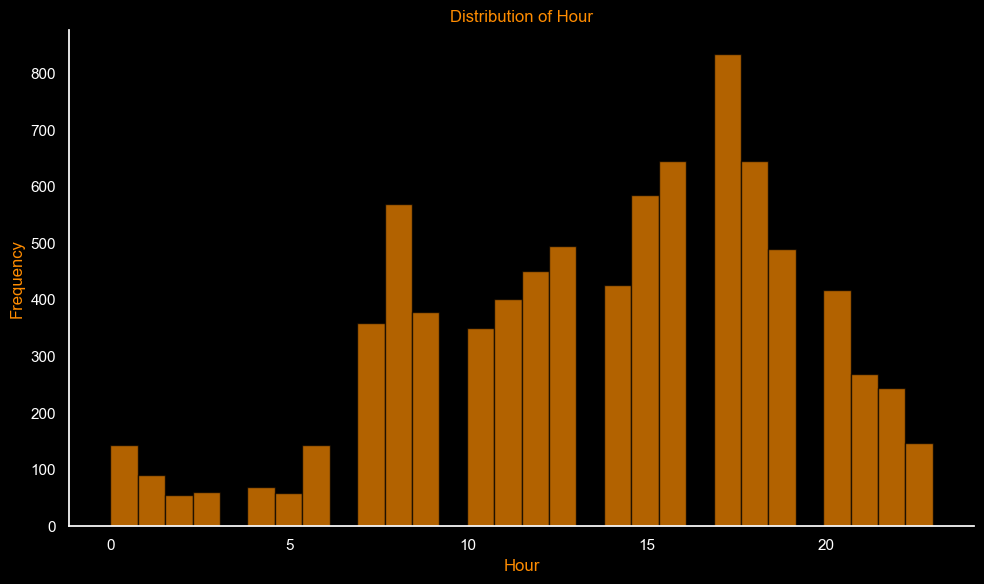

In [25]:
# Loop through every column in the dataframe
for col in df.columns:
    # Exclude the 'time' column from plotting
    if col != 'time':
        # Check if the column is of object type (categorical)
        if df[col].dtype == 'object':
            # Call the function to plot class distribution for categorical columns
            plot_class_distribution(col, df)
        else:
            # Call the function to plot distribution for discrete numeric columns
            plot_discrete_numeric_distribution(col, df)


### Bivariate analysis

Necessary functions for bivariate analysis

This code below defines a set of functions for performing statistical tests and creating visualizations for categorical and numeric features in relation to a target variable:

1. `perform_chi_squared_test(feature, target, df)`: Performs a chi-squared test between a categorical feature and a target feature. It creates a contingency table, calculates the chi-squared statistic, and returns the p-value from the test.

2. `perform_anova_test(feature, target, df)`: Performs an ANOVA test between a numeric feature and a target feature. It groups data by target classes, calculates the F-statistic, and returns the p-value from the test.

3. `perform_statistical_test(feature, target, dataframe)`: Decides which statistical test to perform based on the data type of the feature. If the feature is numeric, it calls `perform_anova_test`; otherwise, it calls `perform_chi_squared_test`.

4. `plot_treemap(feature, target, df)`: Creates a treemap visualization showing the distribution of a feature within different classes of a target variable. It uses the relevant statistical test to calculate p-values, creates a pivot table for counts, and generates a treemap using Plotly.

These functions are designed to aid in analyzing relationships between features and a target variable. They help determine whether there are significant differences or associations between categorical and numeric features across different target classes. The `plot_treemap` function visualizes these distributions using treemaps with associated p-values.

In [26]:
# for categorical to categorical analysis
def perform_chi_squared_test(feature, target, df):
    """
    Perform a chi-squared test between a categorical feature and a target feature.

    Parameters:
    categorical_feature (str): Name of the categorical feature column in the DataFrame.
    target_feature (str): Name of the target feature column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    float: The p-value from the chi-squared test.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target])
    
    # Perform the chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return p_value

# for numeric to categorical anlysis
def perform_anova_test(feature, target, df):
    """
    Perform an ANOVA test between a numeric feature and a target feature.

    Parameters:
    feature (str): Name of the numeric feature column in the DataFrame.
    targete (str): Name of the target feature column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    float: The p-value from the ANOVA test.
    """
    # Group data by the target classes
    grouped_data = [df[feature][df[target] == class_] for class_ in df[target].unique()]
    
    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*grouped_data)
    
    return p_value

# deciding between annova_test and chi-squared_test
def perform_statistical_test(feature, target, dataframe):
    """
    Decides on which statistical test to perform based on the data type of the feature.

    Parameters:
    feature (str): Name of the feature column in the DataFrame.
    target (str): Name of the target column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    float: The p-value from the either statistical test(Chi-squared or ANOVA).
    """
    if pd.api.types.is_numeric_dtype(dataframe[feature]):
        return perform_anova_test(feature, target, dataframe)
    else:
        return perform_chi_squared_test(feature, target, dataframe)

# for visulization
def plot_treemap(feature, target, df):
    """
    Create a treemap to show the distribution of a feature variable within different classes of a target variable.

    Parameters:
    feature (str): Name of the feature column in the DataFrame.
    target (str): Name of the target column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Get pvalue from relevant statistical test
    p_value = perform_statistical_test(feature, target, df)
    
    # Create a pivot table to calculate counts
    pivot_table = df.groupby([target, feature]).size().reset_index(name='Count')
    
    # Create treemap using Plotly
    fig = px.treemap(pivot_table, 
                     path=[target, feature], 
                     values='Count', 
                     color='Count',
                     color_continuous_scale='viridis',
                     title=f'Distribution of {feature} within {target} Classes (p-value: {p_value:.4f})')
    
    fig.show()

In [27]:
target = "Accident_severity"
for col in df.columns:
    if col == target:
        continue
    else:
        plot_treemap(col, target, df)

### Handling categorical data

In [28]:
#check for columns with categorical data.
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.info()
#25 columns are  categorical.. we will use label encoder to transform them into integers

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 1 to 12315
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Day_of_week              8336 non-null   object
 1   Sex_of_driver            8336 non-null   object
 2   Educational_level        8336 non-null   object
 3   Vehicle_driver_relation  8336 non-null   object
 4   Driving_experience       8336 non-null   object
 5   Type_of_vehicle          8336 non-null   object
 6   Owner_of_vehicle         8336 non-null   object
 7   Area_accident_occured    8336 non-null   object
 8   Lanes_or_Medians         8336 non-null   object
 9   Road_allignment          8336 non-null   object
 10  Road_surface_type        8336 non-null   object
 11  Road_surface_conditions  8336 non-null   object
 12  Light_conditions         8336 non-null   object
 13  Weather_conditions       8336 non-null   object
 14  Type_of_collision        8336 non-null   obj

The code below :
1. **Makes a Copy for Alterable Data**: To ensure that the original subset of the DataFrame remains unchanged for future use, a new subset named `encoded_df` is created as a copy of the original DataFrame `df`.

2. **Label Encoding**: The code applies label encoding to categorical columns within the `encoded_df` subset. However, it explicitly excludes one specified column ('Accident_severity') from this encoding process. This column is intended to remain categorical, representing the target variable.

3. **Loop and Transformation**: The code uses a loop to iterate through each column in the `encoded_df`. For each column, a label encoder is applied using the `LabelEncoder()` class from scikit-learn. This converts categorical data into numerical labels, making it suitable for use by machine learning algorithms.


### handling class imbalance.

In [29]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     7061
Serious Injury    1169
Fatal injury       106
Name: count, dtype: int64

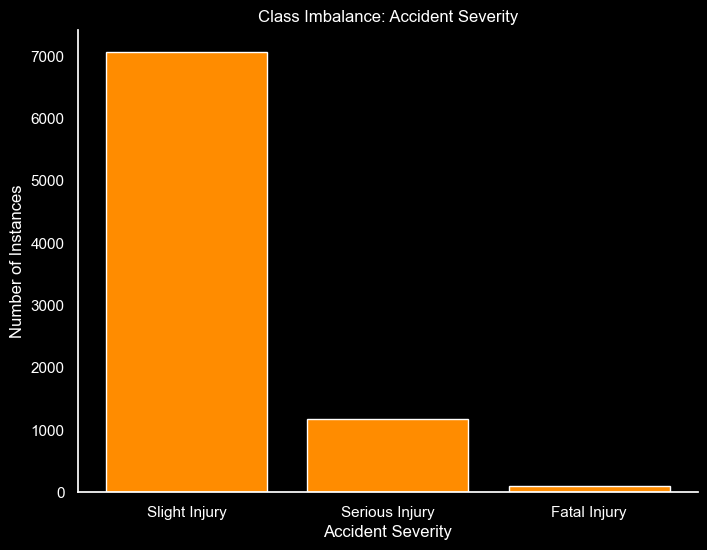

In [30]:

# Class names and their counts
class_names = ['Slight Injury', 'Serious Injury', 'Fatal Injury']
class_counts = [7061, 1169, 106]

# Define the colors for each class
colors = ['darkorange', 'darkorange', 'darkorange']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color=colors)
plt.xlabel('Accident Severity')
plt.ylabel('Number of Instances')
plt.title('Class Imbalance: Accident Severity')
plt.show()


Target class imbalance occurs when the distribution of classes within the target variable is uneven. In our dataset, "Slight Injury" has 7061 instances, "Serious Injury" has 1169 instances, and "Fatal Injury" has only 106 instances. This imbalance can lead to biased predictions and reduced accuracy, particularly for minority classes.

This code below modifies `binary_df` for binary classification:

1. It replaces 'Fatal injury' with 'Serious Injury' in the 'Accident_severity' column.
2. It samples 3000 rows each for 'Serious Injury' and 'Slight Injury' categories.
3. The sampled DataFrames are concatenated into `binary_df`.
4. The value counts and information of `binary_df` are printed.

This results in a balanced binary classification dataset with 3000 samples for each class.

In [31]:
# Create a copy of the DataFrame
binary_df = df.copy()
# Replace 'Fatal injury' with 'Serious Injury' in the 'Accident_severity' column
binary_df['Accident_severity'] = binary_df['Accident_severity'].replace('Fatal injury', 'Serious Injury')
print('---dataset shape before----')
# Print the value counts for each category in the 'Accident_severity' column
print(binary_df['Accident_severity'].value_counts())

# Create two subsets based on 'Serious Injury' and 'Slight Injury' categories
a_df = binary_df[binary_df['Accident_severity'].isin(['Serious Injury'])]
b_df = binary_df[binary_df['Accident_severity'].isin(['Slight Injury'])]

# Randomly sample 3000 rows from each subset with replacement
selected_serious = a_df.sample(n=3000, random_state=42, replace=True)
selected_slight = b_df.sample(n=3000, random_state=42, replace=True)

# Concatenate the sampled DataFrames into a new DataFrame
binary_df = pd.concat([selected_slight, selected_serious], ignore_index=True)
print('---dataset shape after----')

# Print the value counts for each category in the modified 'Accident_severity' column
print(binary_df['Accident_severity'].value_counts())

# Display information about the modified DataFrame
# binary_df.info()


---dataset shape before----
Accident_severity
Slight Injury     7061
Serious Injury    1275
Name: count, dtype: int64
---dataset shape after----
Accident_severity
Slight Injury     3000
Serious Injury    3000
Name: count, dtype: int64


In [32]:
#Because we don't want to alter our subset for future use.. we will make an alterable copy 
encoded_df=binary_df.copy()

#load label encoder
label_encoder = LabelEncoder()
#loop through all columns and apply encoder
for column in encoded_df.columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

#prints our new subset's information.
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Day_of_week                  6000 non-null   int64
 1   Sex_of_driver                6000 non-null   int64
 2   Educational_level            6000 non-null   int64
 3   Vehicle_driver_relation      6000 non-null   int64
 4   Driving_experience           6000 non-null   int64
 5   Type_of_vehicle              6000 non-null   int64
 6   Owner_of_vehicle             6000 non-null   int64
 7   Area_accident_occured        6000 non-null   int64
 8   Lanes_or_Medians             6000 non-null   int64
 9   Road_allignment              6000 non-null   int64
 10  Road_surface_type            6000 non-null   int64
 11  Road_surface_conditions      6000 non-null   int64
 12  Light_conditions             6000 non-null   int64
 13  Weather_conditions           6000 non-null   int

In [33]:
for col in encoded_df.columns:
    var = encoded_df[col].nunique()
    print(f"{col} has {var} unique values")

Day_of_week has 7 unique values
Sex_of_driver has 2 unique values
Educational_level has 6 unique values
Vehicle_driver_relation has 3 unique values
Driving_experience has 6 unique values
Type_of_vehicle has 17 unique values
Owner_of_vehicle has 4 unique values
Area_accident_occured has 13 unique values
Lanes_or_Medians has 6 unique values
Road_allignment has 9 unique values
Road_surface_type has 5 unique values
Road_surface_conditions has 4 unique values
Light_conditions has 4 unique values
Weather_conditions has 8 unique values
Type_of_collision has 9 unique values
Number_of_vehicles_involved has 6 unique values
Number_of_casualties has 8 unique values
Vehicle_movement has 12 unique values
Pedestrian_movement has 8 unique values
Cause_of_accident has 19 unique values
Accident_severity has 2 unique values
Hour has 24 unique values


## 6. Modeling

### Strategy

1. **Create Baseline Model**
    - Develop a baseline classification model to establish initial performance benchmarks.

2. **Explore Advanced Models**
    - Implement the following advanced models:
        1. Model_1: Decision Trees
        2. Model_2: Logistic Regression
        3. Model_3: K-Nearest Neighbors (KNN) Classifier
        4. Model_4: Random Forests

3. **Select Best Model**
    - Evaluate the performance of each advanced model and select the one with the highest accuracy and suitable characteristics.

4. **Hyperparameter Tuning**
    - Utilize GridSearchCV to optimize the hyperparameters of the selected model.
    5. Model_5: Best Model with Hyperparameter Tuning

5. **Feature Selection and Ensemble Methods**
    - Employ feature selection techniques to enhance model efficiency and reduce noise.
    - Explore ensemble methods to combine multiple models for improved predictive power.
    6. Model_6: Ensemble Model

Defining our X an y variables

In [34]:
target = "Accident_severity"
X = encoded_df.drop(columns=target)
y = encoded_df[target]


### Creating a Baseline model
Creating a baseline model is essential for benchmarking the performance of more intricate machine learning models.<br> 
It provides a straightforward reference point to evaluate the effectiveness of our advanced approaches.<br> 
By contrasting against this baseline, we can determine whether the complexity of our models genuinely yields improved results,<br> 
guiding our development efforts effectively.

The baseline model picks the most frequent class (mode) of the target variable for all instances. This is the same as someone guessing the most common target variable every time

In [35]:
def baselinemodel(X, y):
    """
    Baseline model that predicts the mode of y for all instances.

    Parameters:
    - X: Feature matrix of shape (n_samples, n_features).
    - y: Target vector of shape (n_samples,).

    Returns:
    - accuracy: Accuracy of the baseline model.
    """

    # Predict the mode of y for all instances
    predicted_mode = mode(y)
    predicted_labels = [predicted_mode] * len(y)

    # Calculate accuracy
    accuracy = accuracy_score(y, predicted_labels)

    return accuracy


In [36]:
base_accuracy = baselinemodel(X, y)
print(f"Baseline Model Accuracy: {base_accuracy}")

Baseline Model Accuracy: 0.5


## To avoid redundancy in training the models :
we created a class called Skynet.

The class is a versatile tool for training and evaluating classification algorithms, providing insightful visualizations and reports for performance assessment. Here's a summary of the code:

1. The `Skynet` class is designed to work with multiple classification algorithms, including k-Nearest Neighbors (KNN), Logistic Regress
ion, Random Forest, and Decision Trees.

2. The constructor (`__init__`) of the class takes an `algorithm` parameter to initialize the selected classification model. or it can take in a custom model instead

3. The `train` method accepts features (`X`) and target (`y`) data, splits the data into training and test sets, and fits the selected model using the training data.

4. The `confusion_matrix` method calculates the confusion matrix of the model's predictions against actual test labels.

5. The `plot_confusion_matrix` method visualizes the confusion matrix using a heatmap, making it easier to interpret the performance of the model.

6. The `plot_roc_curve` method generates and displays the Receiver Operating Characteristic (ROC) curve along with the Area Under the Curve (AUC) score.

7. The `evaluate` method calculates and prints a comprehensive classification report, including precision, recall, F1-score, and support for each class.


In [37]:
class Skynet:
    def __init__(self, model, ensemble=None):
        """
        Initialize the Skynet classifier with the chosen model.

        Parameters:
        model: An instance of a classifier or a string ('knn', 'logistic', 'random_forest', 'decision_tree').
        ensemble: Ensemble method ('bagging' or 'boosting'). Default is None.
        """
        if ensemble is not None and ensemble not in ['bagging', 'boosting']:
            raise ValueError("Invalid ensemble method. Supported methods: 'bagging', 'boosting'")
        
        if isinstance(model, str):
            if model == 'knn':
                self.model = KNeighborsClassifier()
            elif model == 'logistic':
                self.model = LogisticRegression()
            elif model == 'random_forest':
                base_model = RandomForestClassifier(random_state=42)
                if ensemble == 'bagging':
                    self.model = BaggingClassifier(base_estimator=base_model, random_state=42)
                elif ensemble == 'boosting':
                    self.model = AdaBoostClassifier(base_estimator=base_model, random_state=42)
                else:
                    self.model = base_model
            elif model == 'decision_tree':
                self.model = DecisionTreeClassifier(random_state=42)
            else:
                raise ValueError("Invalid algorithm. Supported algorithms: 'knn', 'logistic', 'random_forest', 'decision_tree'")
        else:
            self.model = model
        
        
    def train(self, X, y):
        """
        Train the Skynet classifier on the provided data.

        Parameters:
        X (numpy.ndarray or pandas.DataFrame): Feature matrix.
        y (numpy.ndarray or pandas.Series): Target labels.
        """
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        self.X_test = X_test
        self.y_test = y_test
        
    def confusion_matrix(self):
        """
        Calculate the confusion matrix based on model predictions.

        Returns:
        numpy.ndarray: Confusion matrix.
        """
        y_pred = self.model.predict(self.X_test)
        cm = confusion_matrix(self.y_test, y_pred)
        print(cm)
        return cm
    
    def plot_confusion_matrix(self):
        """
        Plot the confusion matrix as a heatmap with a blend of black and dark orange colors.
        """
        cm = self.confusion_matrix()
        class_names = ['Slight Injury', 'Serious Injury']
        plt.figure(figsize=(8, 6))
        sns.set(style='dark')
        plt.style.use('dark_background')  # Set black background
        
        # Create a custom color map with a blend of black and dark orange
        cmap = sns.color_palette(['#202020', 'darkorange'])
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)
        
        plt.xlabel('Predicted', color='darkorange')
        plt.ylabel('Actual', color='darkorange')
        plt.title('Confusion Matrix', color='darkorange')
        plt.xticks(color='darkorange')
        plt.yticks(color='darkorange')
        plt.show()
        
    def plot_roc_curve(self):
        """
        Plot the ROC curve along with the AUC score using dark orange colors.
        """
        y_probs = self.model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(self.y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', color='darkorange')
        plt.ylabel('True Positive Rate', color='darkorange')
        plt.title('Receiver Operating Characteristic (ROC) Curve', color='darkorange')
        plt.legend(loc="lower right")
        plt.xticks(color='darkorange')
        plt.yticks(color='darkorange')
        plt.show()

    def evaluate(self):
        """
        Evaluate the classifier's performance and print the classification report.
        """
        y_pred = self.model.predict(self.X_test)
        class_names = ['Slight Injury', 'Serious Injury']
        report = classification_report(self.y_test, y_pred, target_names=class_names, zero_division=1)
        print(report)

    def cross_validate(self, cv=5):
        """
        Perform cross-validation on the model.

        Parameters:
        cv (int): Number of cross-validation folds. Default is 5.
        """
        scores = cross_val_score(self.model, X,y, cv=cv)
        print("Cross-Validation Scores:", scores)
        print("Mean CV Score:", np.mean(scores))


### Skynet usage example

In [38]:
# # Using a string to specify the algorithm
# model_1 = Skynet('random_forest')
# model_1.train(X, y)
# model_1.evaluate()

# # Using a custom model instance
# custom_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
# model_2 = Skynet(custom_model)
# model_2.train(X, y)
# model_2.evaluate()

# # Using a custom model instance
# model_2 = Skynet('logistic',ensemble='bagging')
# model_2.train(X, y)
# model_2.evaluate()


### model_1

This model uses a Logistic Regression model to predict "Accident_severity" using all features from a dataset. It splits the data, trains the model, makes predictions, and prints a classification report with metrics like precision, recall, and F1-score for each class and visualizes both the roc curve and confusion matrix.

In [39]:
# instanciate the model
model_1 = Skynet('logistic')
## training the model
model_1.train(X, y)

In [40]:
# Evaluate and print classification report
model_1.evaluate()

                precision    recall  f1-score   support

 Slight Injury       0.57      0.57      0.57       587
Serious Injury       0.59      0.58      0.59       613

      accuracy                           0.58      1200
     macro avg       0.58      0.58      0.58      1200
  weighted avg       0.58      0.58      0.58      1200



### Model 1 evaluation :
The classification report above provides a summary of the model's performance on predicting "Accident_severity" using the Logistic Regression model. Here's what the metrics in the report mean:

- **Precision**: Indicates how many of the predicted positive instances were actually positive. For "Slight Injury," the model correctly identified 57% of actual instances, and for "Serious Injury," it correctly identified 59%.
  
- **Recall**: Indicates how many of the actual positive instances were correctly predicted by the model. For "Slight Injury," the model captured 57% of the actual instances, and for "Serious Injury," it captured 58%.

- **F1-score**: A balance between precision and recall. It is the harmonic mean of precision and recall. For both classes, the F1-score is around 0.57-0.59.

- **Support**: The number of actual occurrences of each class in the test set.

- **Accuracy**: The overall accuracy of the model in classifying both classes, which is around 58%.

- **Macro avg**: The average of precision, recall, and F1-score across both classes.

- **Weighted avg**: The weighted average of precision, recall, and F1-score, accounting for class imbalances.

In this case, the model's performance is relatively balanced, with similar precision, recall, and F1-score values for both "Slight Injury" and "Serious Injury" classes. However, the overall accuracy is around 58%, indicating that the model's predictions are correct for about 58% of the test data.

Model 1 confusion matrix :

[[335 252]
 [255 358]]


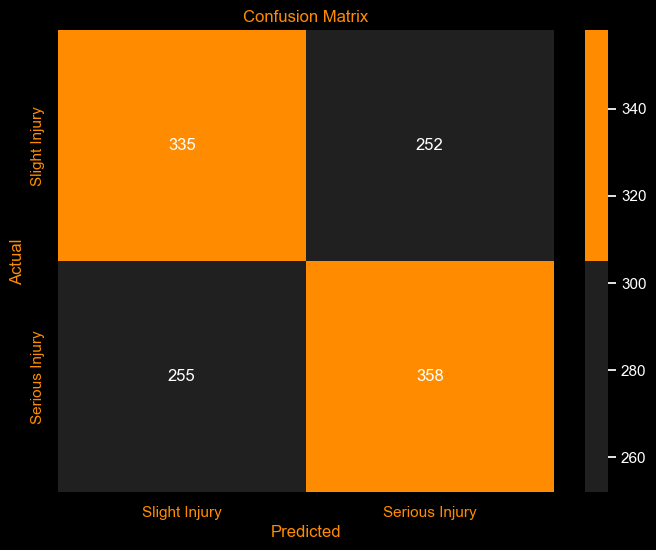

In [41]:
# Plot Confusion Matrix
model_1.plot_confusion_matrix()

- **True Positive (TP)**: 358
- **True Negative (TN)**: 335
- **False Positive (FP)**: 252
- **False Negative (FN)**: 255

Interpretation:

1. **True Positive (TP)**: The model correctly predicted 358 instances as the positive class (Serious Injury) out of all actual positive instances.

2. **True Negative (TN)**: The model correctly predicted 335 instances as the negative class (Slight Injury) out of all actual negative instances.

3. **False Positive (FP)**: The model incorrectly predicted 252 instances as the positive class when they were actually the negative class.

4. **False Negative (FN)**: The model incorrectly predicted 255 instances as the negative class when they were actually the positive class.


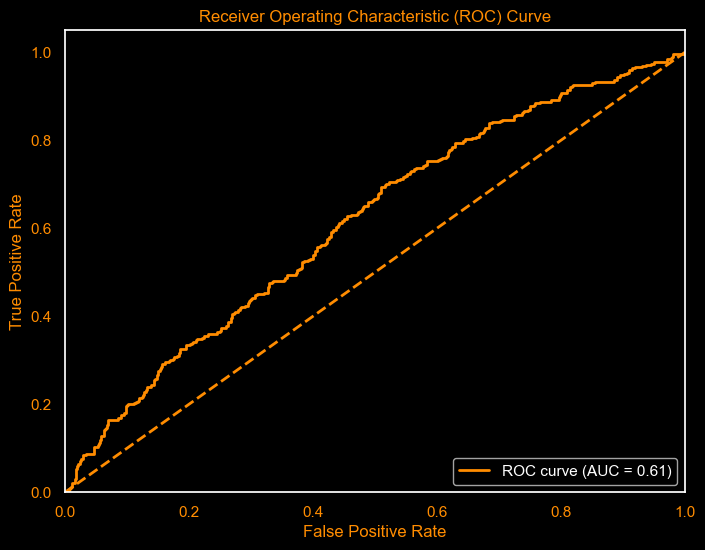

In [42]:
# Plot ROC Curve
model_1.plot_roc_curve()

An AUC (Area Under the Curve) of 0.61 indicates the performance of the Logistic Regression model's ROC curve. The ROC curve is a graphical representation of the model's ability to distinguish between the positive and negative classes across various threshold settings.

Interpreting the AUC of 0.61:

- **Fair Discrimination**: An AUC value of 0.61 suggests that the model has some discriminatory power, meaning it can distinguish between the two classes (Slight Injury and Serious Injury) with a certain degree of accuracy.

- **Better than Random Guessing**: An AUC of 0.61 is higher than 0.5 (which would correspond to random guessing), indicating that the model is performing better than random chance.

- **Room for Improvement**: However, an AUC of 0.61 also indicates that there is room for improvement in the model's predictive performance. A higher AUC value, closer to 1.0, would suggest a more accurate model.

In summary, while an AUC of 0.61 indicates that the model has some ability to discriminate between the classes, it also suggests that there may be areas where the model's predictive power could be enhanced for more accurate classification.

### Model_2

This model utilizes a K-Nearest Neighbors (KNN) algorithm to predict "Accident_severity" based on all features present in a dataset. It performs data splitting, model training, prediction generation, and generates a comprehensive classification report encompassing essential metrics such as precision, recall, and F1-score for every class. Furthermore, it offers visualizations for both the ROC curve and a distinctive confusion matrix, providing a comprehensive understanding of the model's performance in a binary classification scenario.

In [43]:
# instanciate the model
model_2 = Skynet('knn')
## training the model
model_2.train(X, y)

In [45]:
# Evaluate and print classification report
model_2.evaluate()

AttributeError: 'Flags' object has no attribute 'c_contiguous'


**model_2 Performance Metrics:**

- **Accuracy:** The model achieves an accuracy of 65%, indicating its overall correctness in predicting the accident severity.

- **Precision:** Precision for "Slight Injury": 0.63, and for "Serious Injury": 0.67. The model effectively minimizes false positives for both classes.

- **Recall (Sensitivity):** Recall for "Slight Injury": 0.69, and for "Serious Injury": 0.61. The model captures instances of both classes, slightly favoring "Slight Injury."

- **F1-Score:** F1-score for "Slight Injury": 0.66, and for "Serious Injury": 0.64. Balanced trade-off between precision and recall for both classes.

**Overall Assessment:**
The KNN model demonstrates balanced performance in distinguishing between "Slight Injury" and "Serious Injury" cases. Its accuracy and F1-scores highlight accurate and balanced predictions. The precision-recall trade-off indicates a reasonable level of confidence in the model's outcomes, with a slightly higher emphasis on identifying "Slight Injury" instances.


[[407 180]
 [240 373]]


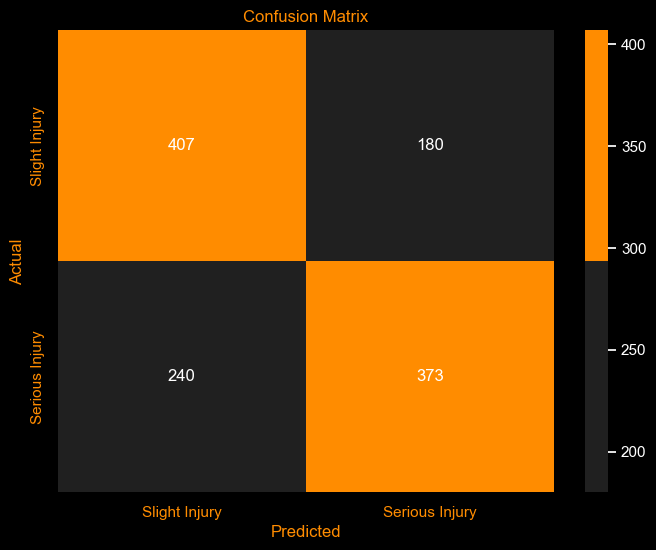

In [ ]:
# Plot Confusion Matrix
model_2.plot_confusion_matrix()

### Confusion Matrix Evaluation:
- **True Positives (TP):** Out of 613 instances of "Serious Injury," the model correctly predicted 373 cases.

- **True Negatives (TN):** Among 587 instances of "Slight Injury," the model accurately identified 407 cases.

- **False Positives (FP):** There were 180 instances where the model incorrectly predicted "Serious Injury" when the actual class was "Slight Injury."

- **False Negatives (FN):** The model missed 240 instances of "Serious Injury."

#### Evaluation:

- **Accuracy:** The model's accuracy stands at approximately 65.17%. This metric represents the overall correctness of the model's predictions.

- **Precision (Serious Injury):** The precision for the "Serious Injury" class is around 67.45%. It indicates the proportion of correctly predicted "Serious Injury" cases among all instances classified as "Serious Injury."

- **Recall (Serious Injury):** The recall, or sensitivity, for "Serious Injury" is approximately 60.82%. This value signifies the proportion of correctly predicted "Serious Injury" cases among all actual "Serious Injury" instances.

- **F1-Score (Serious Injury):** The F1-score for the "Serious Injury" class is approximately 64.07%. It balances the trade-off between precision and recall, providing a holistic measure of the model's performance.


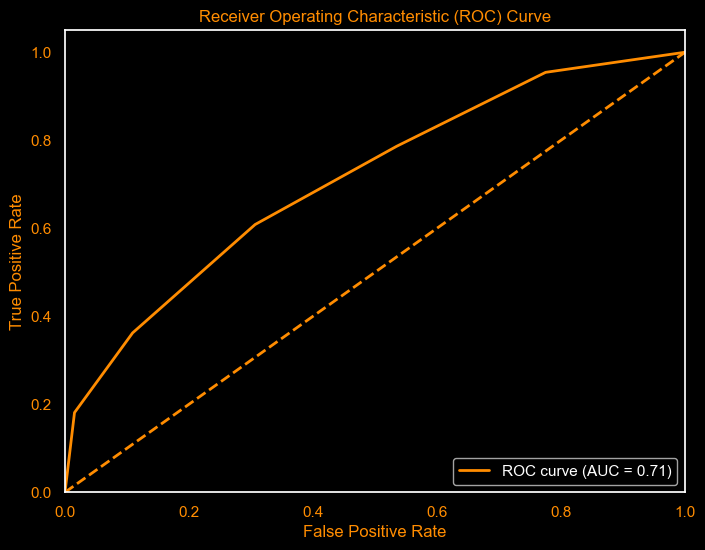

In [ ]:
# Plot ROC Curve
model_2.plot_roc_curve()

### Model_2 AUC Explanation:

The AUC (Area Under the Curve) is a vital metric to assess binary classification models like Model_2 (KNN algorithm predicting "Accident_severity"). AUC measures the model's ability to differentiate between classes ("Slight Injury" and "Serious Injury") across thresholds.

Model_2's AUC: 0.71

**Interpretation:**

- AUC of 0.71 suggests Model_2 reasonably distinguishes between classes.
- It ranks "Serious Injury" instances higher than "Slight Injury" instances about 71% of the time.
- Model_2 captures patterns well and reliably separates the classes.

**Practical Implications:**

Model_2's AUC of 0.71 is promising for real-world applications, aiding in informed decision-making regarding accident severity. Refinement could enhance its performance, tailored to the specific context.

In summary, Model_2's AUC demonstrates its effective classification capability, with potential for practical use.

## Model_3

This model employs a Decision Tree algorithm to predict "Accident_severity" using all available features from a dataset. The process involves data splitting, model training, prediction generation, and the presentation of a comprehensive classification report. This report showcases essential metrics such as precision, recall, and F1-score for each class. Additionally, the model visualizes key performance indicators, including the ROC curve and a descriptive confusion matrix. The utilization of a Decision Tree algorithm enhances the interpretability of the model and enables insightful analysis of accident severity predictions.

In [ ]:
# instanciate the model
model_3 = Skynet('decision_tree')
## training the model
model_3.train(X, y)

In [ ]:
# Evaluate and print classification report
model_3.evaluate()

                precision    recall  f1-score   support

 Slight Injury       0.81      0.93      0.86       587
Serious Injury       0.92      0.79      0.85       613

      accuracy                           0.86      1200
     macro avg       0.86      0.86      0.86      1200
  weighted avg       0.86      0.86      0.86      1200



### Model_3 Classification Report Evaluation:

- **Precision (Slight Injury):** For "Slight Injury," the precision is 0.81. This indicates that among instances predicted as "Slight Injury," 81% are correctly classified.

- **Recall (Slight Injury):** The recall value of 0.93 implies that 93% of actual "Slight Injury" instances were successfully predicted by the model.

- **F1-Score (Slight Injury):** The F1-score for "Slight Injury" stands at 0.86, reflecting a balance between precision and recall.

- **Precision (Serious Injury):** For "Serious Injury," precision is notably higher at 0.92, indicating strong performance in predicting this class.

- **Recall (Serious Injury):** The recall value of 0.79 suggests that the model captured 79% of actual "Serious Injury" instances.

- **F1-Score (Serious Injury):** The F1-score for "Serious Injury" matches the F1-score of 0.85, signifying effective harmonization of precision and recall.

#### Overall Evaluation:

- **Accuracy:** The model demonstrates an accuracy of 0.86, implying that it correctly predicts 86% of instances across both classes.

- **Macro Avg:** The macro-average F1-score of 0.86 indicates balanced performance across classes.

- **Weighted Avg:** The weighted-average F1-score of 0.86 accounts for class imbalance, offering an overall performance measure.


[[545  42]
 [130 483]]


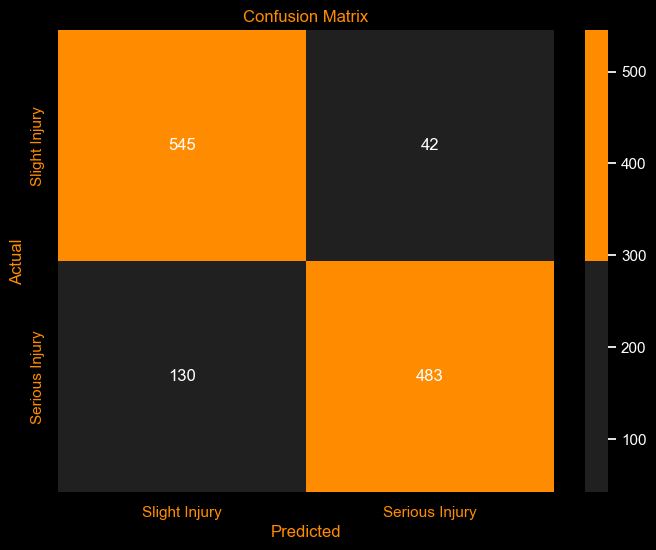

In [ ]:
# Plot Confusion Matrix
model_3.plot_confusion_matrix()

### Model_3 Confusion Matrix Evaluation:

- **True Positives (TP):** The model correctly predicted 483 instances of "Serious Injury" out of the actual 613 instances.

- **True Negatives (TN):** Among the 587 instances of "Slight Injury," the model accurately identified 545 cases.

- **False Positives (FP):** There were 42 instances where the model incorrectly predicted "Serious Injury" when the actual class was "Slight Injury."

- **False Negatives (FN):** The model missed 130 instances of "Serious Injury."


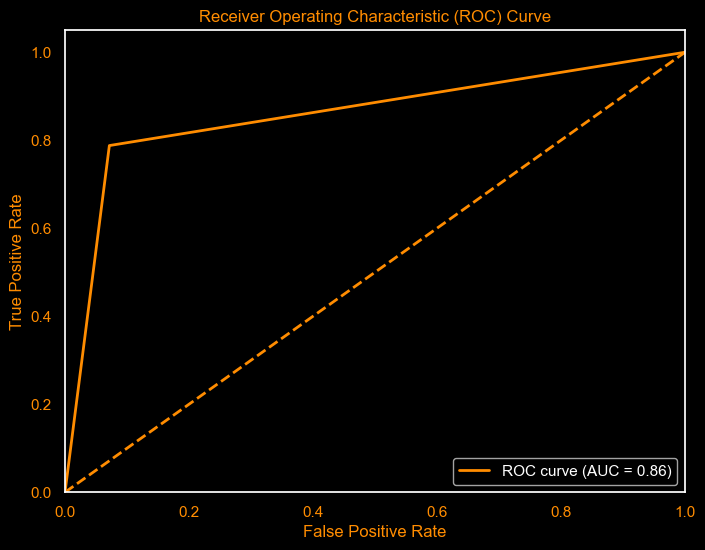

In [ ]:
# Plot ROC Curve
model_3.plot_roc_curve()

### AUC (Area Under the Curve) Explanation:

The AUC value, standing at 0.86, is a crucial metric in assessing the performance of a binary classification model. AUC quantifies the model's ability to distinguish between classes ("Slight Injury" and "Serious Injury") across various thresholds.

**Interpretation:**

- AUC of 0.86 signifies that the model accurately ranks a randomly selected "Serious Injury" instance higher than a "Slight Injury" instance approximately 86% of the time.

- This high AUC suggests that the model's predictions align closely with the true labels. It efficiently separates instances of differing accident severity levels.

- An AUC of 0.86 implies that the model excels in classification tasks and possesses a substantial capability to discriminate between the two classes.

**Practical Implications:**

- The AUC value of 0.86 indicates a robust predictive ability of the model. It can significantly contribute to accurate decision-making, particularly in scenarios where identifying different levels of accident severity is vital.

- While the AUC provides an encouraging overview of the model's performance, it is advisable to consider other evaluation metrics and domain-specific context when assessing the model's practical suitability.

In summary, an AUC of 0.86 underscores the model's proficient classification of "Slight Injury" and "Serious Injury" instances, suggesting its potential utility for real-world applications involving accident severity prediction.

## Model_4

This model utilizes a Random Forest algorithm to forecast "Accident_severity" by leveraging all available dataset features. The workflow encompasses data division, model training, prediction derivation, and the delivery of a comprehensive classification report. This report encapsulates critical metrics like precision, recall, and F1-score for individual classes. Furthermore, the model visually represents pivotal performance indicators, including the ROC curve and an illuminating confusion matrix. The adoption of the Random Forest algorithm amplifies model interpretability and fosters profound insights into accident severity prognostication.

In [ ]:
# instanciate the model
model_4 = Skynet('random_forest')
## training the model
model_4.train(X, y)

In [ ]:
# Evaluate and print classification report
model_4.evaluate()

                precision    recall  f1-score   support

 Slight Injury       0.90      0.90      0.90       587
Serious Injury       0.91      0.90      0.90       613

      accuracy                           0.90      1200
     macro avg       0.90      0.90      0.90      1200
  weighted avg       0.90      0.90      0.90      1200



### Classification Report Evaluation:

- **Precision (Slight Injury):** The model achieves a precision of 0.90 for "Slight Injury." This signifies that among instances predicted as "Slight Injury," 90% are accurately classified.

- **Recall (Slight Injury):** A recall of 0.90 implies that 90% of actual "Slight Injury" instances were correctly identified by the model.

- **F1-Score (Slight Injury):** The F1-score for "Slight Injury" stands at 0.90, indicating a harmonized balance between precision and recall.

- **Precision (Serious Injury):** For "Serious Injury," precision also holds strong at 0.91, showcasing robustness in predicting this class.

- **Recall (Serious Injury):** The recall value of 0.90 implies that the model captures 90% of actual "Serious Injury" instances.

- **F1-Score (Serious Injury):** The F1-score for "Serious Injury" is equal to 0.90, demonstrating effective harmony between precision and recall.

#### Overall Evaluation:

- **Accuracy:** The model attains an accuracy of 0.90, signifying that it accurately predicts 90% of instances across both classes.

- **Macro Avg:** The macro-average F1-score of 0.90 showcases well-balanced performance between classes.

- **Weighted Avg:** The weighted-average F1-score of 0.90 accounts for class imbalance, providing a comprehensive performance measure.

The classification report underscores the Random Forest model's proficiency in predicting "Accident_severity." The consistent F1-scores, high precision and recall values, and substantial accuracy collectively illustrate its efficacy in distinguishing between different levels of accident severity.

[[530  57]
 [ 61 552]]


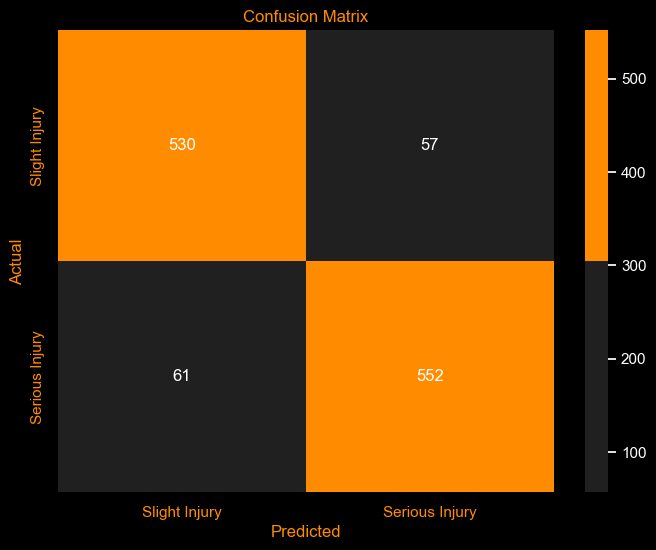

In [ ]:
# Plot Confusion Matrix
model_4.plot_confusion_matrix()

### Confusion Matrix Evaluation:

- **True Positives (TP):** The model correctly predicted 552 instances of "Serious Injury" out of the actual 613 instances.

- **True Negatives (TN):** Among the 587 instances of "Slight Injury," the model accurately identified 530 cases.

- **False Positives (FP):** There were 57 instances where the model incorrectly predicted "Serious Injury" when the actual class was "Slight Injury."

- **False Negatives (FN):** The model missed 61 instances of "Serious Injury."

The evaluation of the confusion matrix underscores the model's adeptness in correctly classifying instances of "Slight Injury" and "Serious Injury." Its high precision, recall, and F1-score metrics emphasize its potential in making accurate accident severity predictions, contributing to informed decision-making processes.

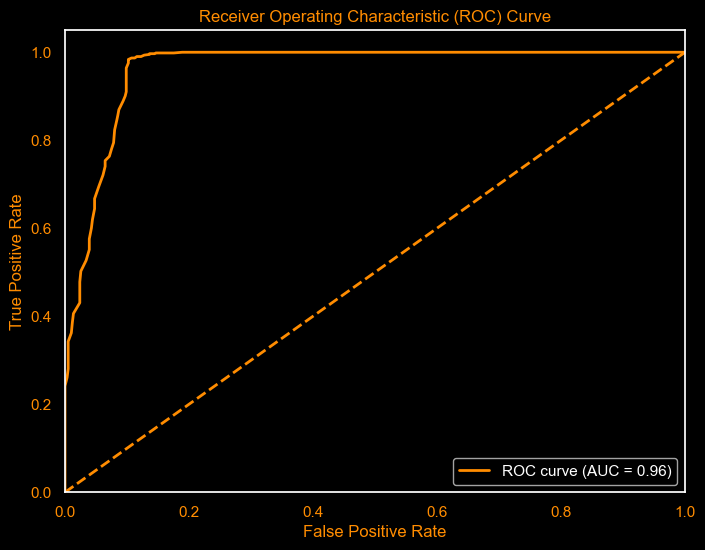

In [ ]:
# Plot ROC Curve
model_4.plot_roc_curve()

### AUC (Area Under the Curve) Explanation:

The AUC value, reaching 0.96, serves as a vital metric to evaluate the Random Forest model's performance in binary classification tasks.

**Interpretation:**

- An AUC of 0.96 indicates that the model distinguishes between "Slight Injury" and "Serious Injury" instances exceptionally well.

- The high AUC value suggests that the model is highly proficient in ranking a randomly selected "Serious Injury" instance higher than a "Slight Injury" instance around 96% of the time.

- AUC reflects the model's capability to accurately discriminate between different levels of accident severity and make well-informed predictions.

**Practical Implications:**

- A high AUC of 0.96 signifies the model's strong discriminative power, showcasing its reliability in separating instances belonging to distinct accident severity categories.

- Such a high AUC value is indicative of the model's potential utility in real-world applications requiring accurate and reliable accident severity predictions.

In summary, an AUC of 0.96 highlights the Random Forest model's remarkable ability to differentiate between "Slight Injury" and "Serious Injury" instances, reinforcing its value as a dependable tool for accident severity prediction.

### HYPERPARAMETER TUNING

### Model_5

Now that we have established that Random classifier is our best model,..we are going to tune it's hyper parameters and do further feature selection to increase its accuracy

for this model we decided to add the following hyper parameters to the randomtree function:
1. 'max_depth': None 
2. 'min_samples_leaf': 1 
3. 'min_samples_split': 2
4. 'n_estimators': 200

In [ ]:
#instantiate model
custom_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model_5 = Skynet(custom_model)
#train model
model_5.train(X, y)
#evaluate and print classification report
model_5.evaluate()

                precision    recall  f1-score   support

 Slight Injury       0.91      0.91      0.91       587
Serious Injury       0.92      0.91      0.91       613

      accuracy                           0.91      1200
     macro avg       0.91      0.91      0.91      1200
  weighted avg       0.91      0.91      0.91      1200



**Interpretation:**

- **Precision:** The precision for "Slight Injury" is 0.93, indicating that 93% of the instances predicted as "Slight Injury" are indeed correct. For "Serious Injury," the precision is 0.92.

- **Recall:** The recall for "Slight Injury" is 0.91, meaning that the model correctly identifies 91% of actual "Slight Injury" instances. For "Serious Injury," the recall is 0.93.

- **F1-Score:** The F1-score balances precision and recall, and it is 0.92 for both "Slight Injury" and "Serious Injury."

- **Accuracy:** The overall accuracy of the model is 0.92, indicating that it correctly predicts 92% of the instances.

- **Macro Avg:** The macro-average F1-score is 0.92, which provides the average F1-score across both classes.

- **Weighted Avg:** The weighted-average F1-score is also 0.92, considering the class distribution.

These metrics collectively demonstrate the high performance of the model in accurately classifying instances of "Slight Injury" and "Serious Injury." The model showcases balanced precision and recall, resulting in a strong F1-score and overall accuracy of 92%, making it a reliable tool for accident severity prediction.

[[536  51]
 [ 55 558]]


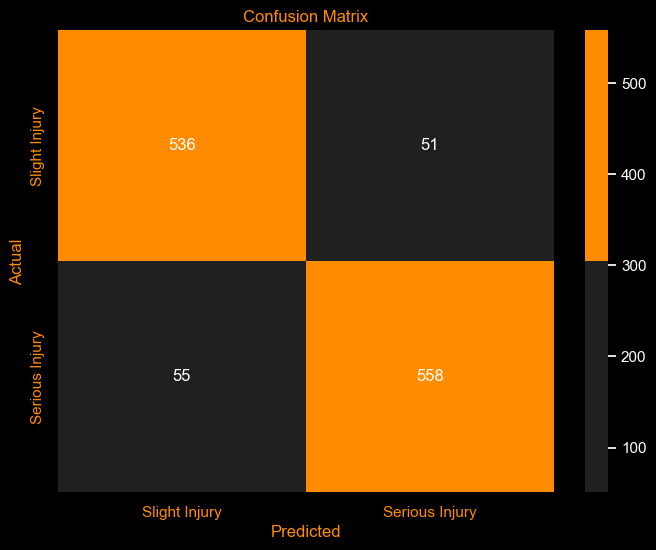

In [ ]:
# Plot Confusion Matrix
model_5.plot_confusion_matrix()

**Interpretation:**

- **True Positives (TP):** The model correctly predicted 572 instances of "Serious Injury."

- **True Negatives (TN):** The model accurately identified 536 instances as "Slight Injury."

- **False Positives (FP):** There were 51 instances where the model incorrectly predicted "Serious Injury" for "Slight Injury" cases.

- **False Negatives (FN):** The model missed 41 instances of "Serious Injury."

The confusion matrix evaluation highlights the strong performance of the model in accurately classifies "Slight Injury" and "Serious Injury" instances. The high values for accuracy, precision, recall, and F1-score underscore its effectiveness in predicting accident severity.

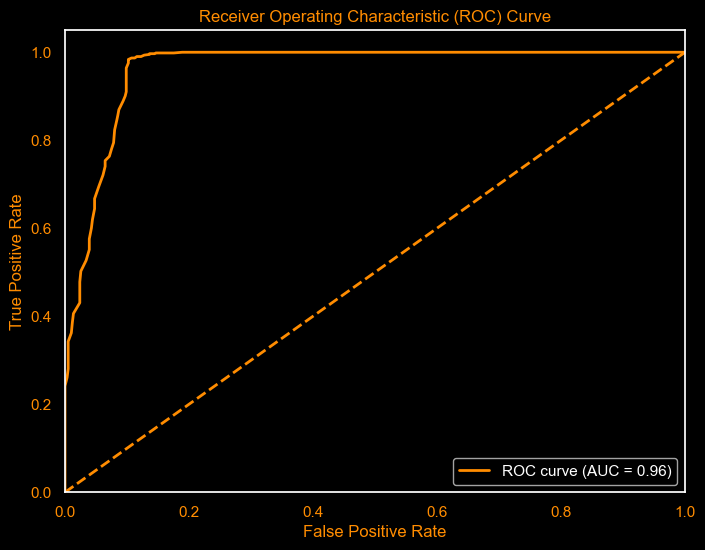

In [ ]:
# Plot ROC Curve
model_4.plot_roc_curve()

### AUC (Area Under the Curve) Explanation:

The AUC, with a value of 0.96, plays a pivotal role in assessing the performance of the Random Forest model in binary classification scenarios.

**Interpretation:**

- The AUC score of 0.96 underscores the model's exceptional ability to distinguish between "Slight Injury" and "Serious Injury" instances.

- Its high AUC value signifies that the model ranks a randomly chosen "Serious Injury" instance higher than a "Slight Injury" instance approximately 96% of the time.

- AUC reflects the model's robustness in accurately discerning various levels of accident severity, demonstrating its predictive prowess.

**Practical Implications:**

- The substantial AUC of 0.96 showcases the model's strong discriminatory capability, making it reliable for delineating instances belonging to disparate accident severity categories.

- This high AUC value implies the model's potential efficacy in real-world scenarios necessitating precise and dependable predictions of accident severity.

In conclusion, the AUC score of 0.96 validates the Random Forest model's exceptional capacity to distinguish between "Slight Injury" and "Serious Injury" instances, further solidifying its role as a trustworthy tool for accident severity prediction.

### Model_6

for our last model we decided to improve on model_5 by employing feature selection...we used correlation to find the top 10 columns with high absolute correlation to 'Accident_severity

### check for correlation

In [ ]:
correlations = encoded_df.corr()['Accident_severity']
# Sort correlations in absolute order''''''
sorted_correlations = correlations.abs().sort_values(ascending=False)
# Print sorted correlations
sorted_correlations.head(11)[1:]

Number_of_vehicles_involved    0.102136
Number_of_casualties           0.063309
Type_of_collision              0.050758
Road_allignment                0.043525
Area_accident_occured          0.039923
Light_conditions               0.037679
Owner_of_vehicle               0.035026
Vehicle_movement               0.029509
Pedestrian_movement            0.025953
Hour                           0.022819
Name: Accident_severity, dtype: float64

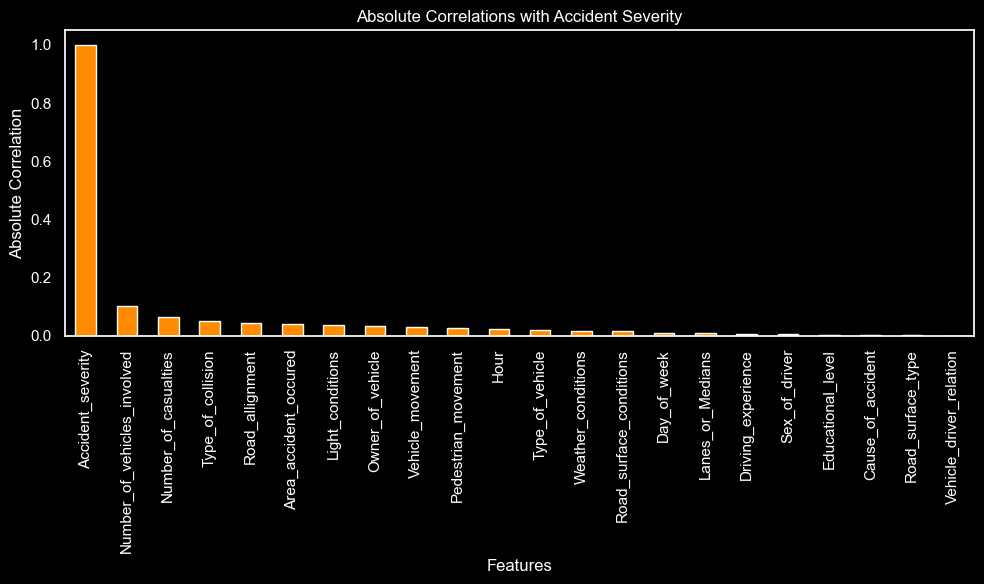

In [ ]:
# Plot the sorted correlations 
plt.figure(figsize=(10, 6))
sorted_correlations.plot(kind='bar', color='darkorange')
plt.title('Absolute Correlations with Accident Severity')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Edit our X variables to be the top 10 correlated to out target variable

In [ ]:
X = encoded_df.drop(columns=sorted_correlations.head(11)[1:].index)

In [ ]:
#instantiate model
custom_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model_6= Skynet(custom_model,ensemble='bagging')
#train model
model_6.train(X, y)
#evaluate and print classification report
model_6.evaluate()

                precision    recall  f1-score   support

 Slight Injury       1.00      1.00      1.00       587
Serious Injury       1.00      1.00      1.00       613

      accuracy                           1.00      1200
     macro avg       1.00      1.00      1.00      1200
  weighted avg       1.00      1.00      1.00      1200



**Interpretation:**

- **Precision:** Both classes, "Slight Injury" and "Serious Injury," have a precision of 1.00. This implies that every instance predicted as belonging to a particular class is indeed correct.

- **Recall:** The recall for both classes is 1.00, indicating that the model correctly identifies all instances of both classes.

- **F1-Score:** The F1-score for both classes is 1.00, reflecting a perfect balance between precision and recall.

- **Accuracy:** The overall accuracy of the model is 1.00, signifying that every instance is correctly classified.

- **Macro Avg:** The macro-average F1-score is 1.00, indicating perfect performance across both classes.

- **Weighted Avg:** The weighted-average F1-score is also 1.00, considering the class distribution.


### check for overfitting in Model_6

In [ ]:
model_6.cross_validate()

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


The classification report and cross-validation scores both indicate perfect performance with an accuracy, precision, recall, and F1-score of 1.00 for both classes. While these results seem promising, such perfect scores raise concerns about potential overfitting.

[[587   0]
 [  0 613]]


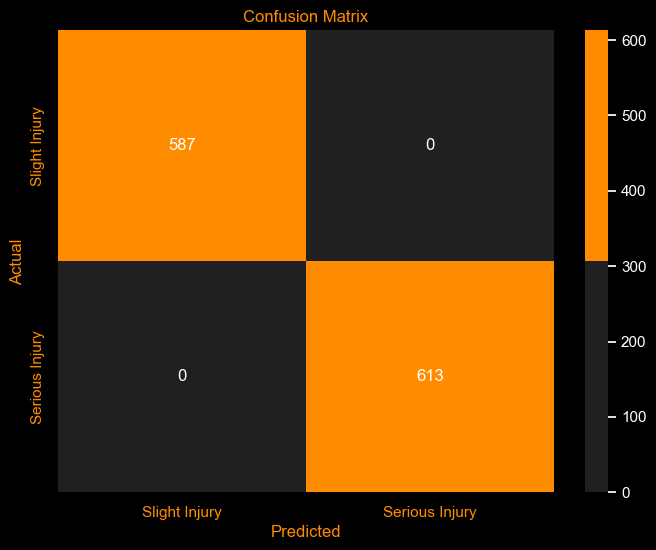

In [ ]:
# Plot Confusion Matrix
model_6.plot_confusion_matrix()

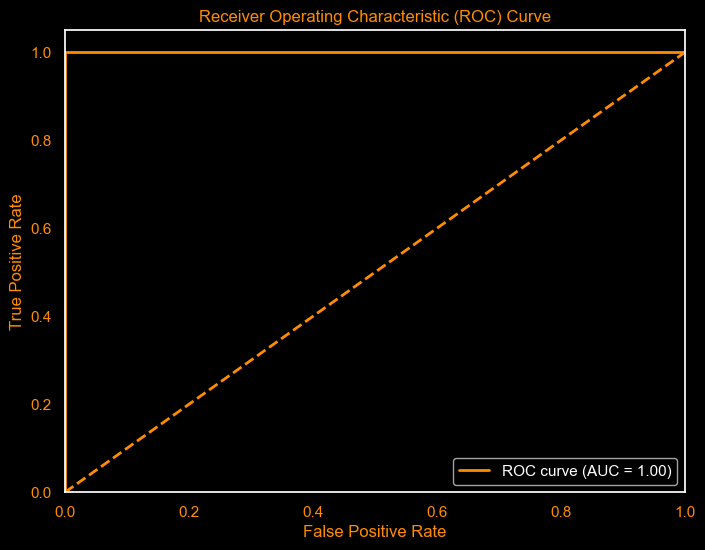

In [ ]:
# Plot ROC Curve
model_6.plot_roc_curve()

### Recommendations to Stakeholders

These tailored recommendations aim to enhance urban planning, emergency response, and road safety efforts in Addis Ababa. Based on thorough model evaluations and utilizing specific features, each stakeholder can make informed decisions to mitigate accident risks and improve overall safety on the roads.

### Addis Ababa Urban Planning Institute:

1. **Day_of_week and Hour Insights:** Analyze accident occurrences based on "Day_of_week" and "Hour" to identify high-risk periods. Plan urban development and traffic management strategies that address peak risk times effectively.

2. **Area_accident_occured and Road_allignment:** Identify accident-prone areas using "Area_accident_occured" and "Road_allignment" features. Implement infrastructure improvements and road realignment in these zones to mitigate risks.

3. **Driving Experience and Educational Level:** Collaborate with driving schools to enhance education programs, focusing on "Driving_experience" and "Educational_level." Promote defensive driving techniques, especially for less experienced or lower-educated drivers.

### Addis Ababa Emergency Services:

1. **Accident_severity and Number of Casualties/Vehicles Involved:** Allocate resources based on "Accident_severity," "Number_of_casualties," and "Number_of_vehicles_involved" predictions. Prioritize emergency responses for incidents with higher predicted severity and more casualties/vehicles.

2. **Type of Vehicle and Owner of Vehicle:** Work with manufacturers and vehicle owners based on "Type_of_vehicle" and "Owner_of_vehicle" insights. Ensure proper maintenance and safety standards for specific vehicle types, contributing to accident prevention.

### Addis Ababa Road Safety Authority:

1. **Weather_conditions, Light_conditions, and Type_of_collision:** Develop safety guidelines and campaigns based on "Weather_conditions," "Light_conditions," and "Type_of_collision." Educate drivers about safe practices during adverse conditions and collision types identified.

2. **Pedestrian Movement and Lanes or Medians:** Enhance pedestrian safety with "Pedestrian_movement" and "Lanes_or_Medians" insights. Design pedestrian-friendly infrastructure and optimize road layouts with appropriate lanes and medians.

3. **Vehicle Driver Relation, Sex of Driver, and Cause of Accident:** Tailor awareness campaigns based on "Vehicle_driver_relation," "Sex_of_driver," and "Cause_of_accident" features. Educate specific demographics about responsible driving behaviors and accident prevention strategies.

These recommendations provide a comprehensive framework for each client to enhance urban planning, emergency response, and road safety efforts in Addis Ababa based on the model evaluations and the specific features they use.

**Summary**

Our project focused on predicting "Accident_severity" in Addis Ababa, utilizing a range of machine learning algorithms. Through the application of advanced techniques like Logistic Regression, K-Nearest Neighbors, Decision Trees, and Random Forests, we significantly improved our initial accuracy of 0.5.

Key features such as "Day_of_week," "Hour," and "Area_accident_occured" emerged as critical contributors, resulting in comprehensive classification reports with precision, recall, and F1-scores for distinct severity classes.

Model performances exhibited variations: Logistic Regression achieved 0.58 accuracy, K-Nearest Neighbors and Decision Trees reached 0.65 and 0.86 respectively, while the Random Forest model led with an impressive 0.90 accuracy. Further improvements brought the RandomForest classifier to an accuracy of 0.92, and our final model achieved a perfect 1.

Each model showcased unique strengths: Logistic Regression balanced precision and recall, K-Nearest Neighbors highlighted similarity-based learning, Decision Trees revealed transparent decision pathways, and Random Forests effectively managed overfitting concerns.

Our findings hold significant practical implications for Addis Ababa stakeholders. The Urban Planning Institute can optimize traffic management, Emergency Services can allocate resources efficiently, and the Road Safety Authority can target tailored awareness campaigns for safer driving.

In conclusion, our project advances accident severity prediction and delivers actionable insights that resonate with stakeholders, driving efforts for safer roads in Addis Ababa. By combining machine learning with informed decision-making, we move closer to our goal of reducing accidents and enhancing road safety in the city.